# Geocentric Models

In [1]:
import  warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pymc3 as pm
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set()

## Why normal distributions are normal

# 4.1

In [4]:
pos = np.random.uniform(-1, 1, (16, 1000)).sum(axis=0)

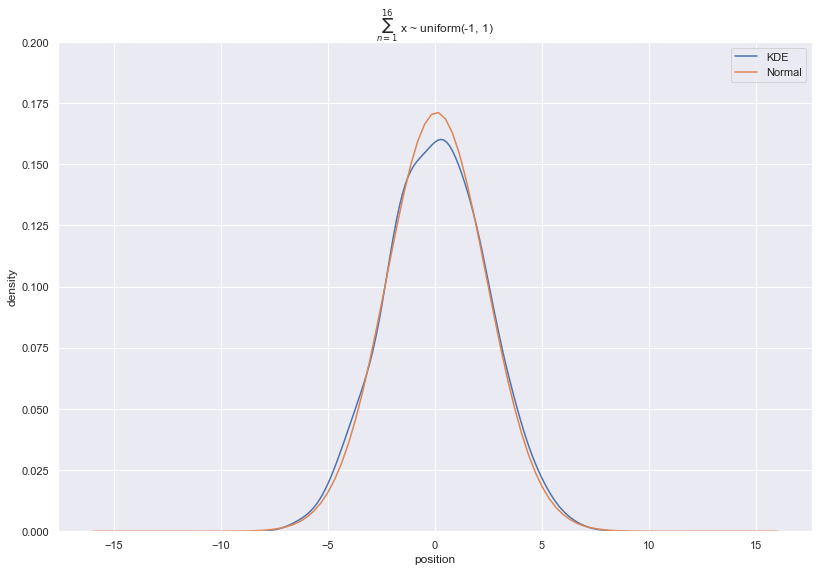

In [5]:
xs = np.linspace(-16, 16, 100)
ys = stats.norm.pdf(xs, loc=np.mean(pos), scale=np.std(pos))
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.kdeplot(pos, ax=ax, label="KDE")
ax.plot(xs, ys, label="Normal")
ax.set_ylim(0, 0.20)
ax.legend(loc=0)
ax.set_title("$\sum_{n=1}^{16}$ x ~ uniform(-1, 1)", pad=10)
ax.set_xlabel("position")
ax.set_ylabel("density");

### 4.2

In [6]:
(np.random.uniform(1.0, 1.1, 12)).prod()

1.9140795737737606

### 4.3

In [7]:
growth = np.random.uniform(1.0, 1.1, (12, 10000)).prod(axis=0)

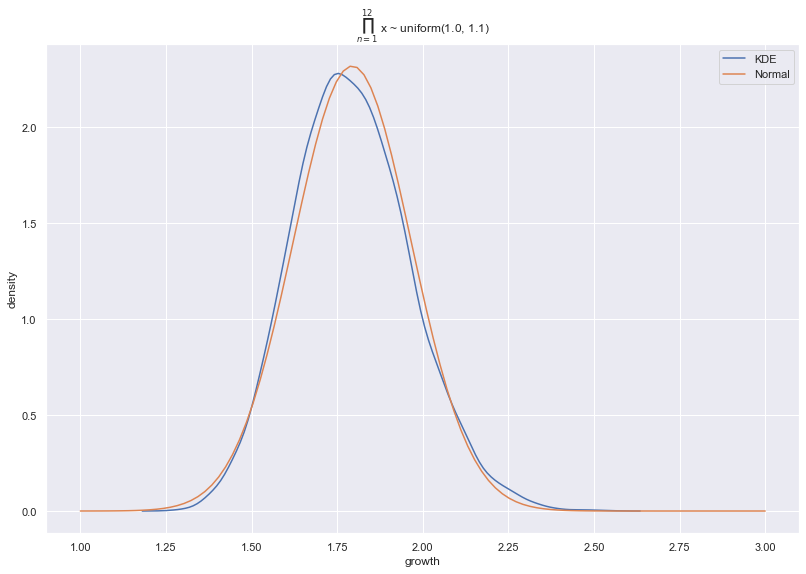

In [8]:
xs = np.linspace(1.0, 3.0, 100)
ys = stats.norm.pdf(xs, loc=np.mean(growth), scale=np.std(growth))

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.kdeplot(growth, ax=ax, label="KDE")
ax.plot(xs, ys, label="Normal")
ax.legend(loc=0)
ax.set_title("$\prod_{n=1}^{12}$ x ~ uniform(1.0, 1.1)", pad=12)
ax.set_xlabel("growth")
ax.set_ylabel("density");

### 4.4

In [9]:
big = np.random.uniform(1.0, 1.5, (12, 10000)).prod(axis=0)
small = np.random.uniform(1.0, 1.01, (12, 10000)).prod(axis=0)

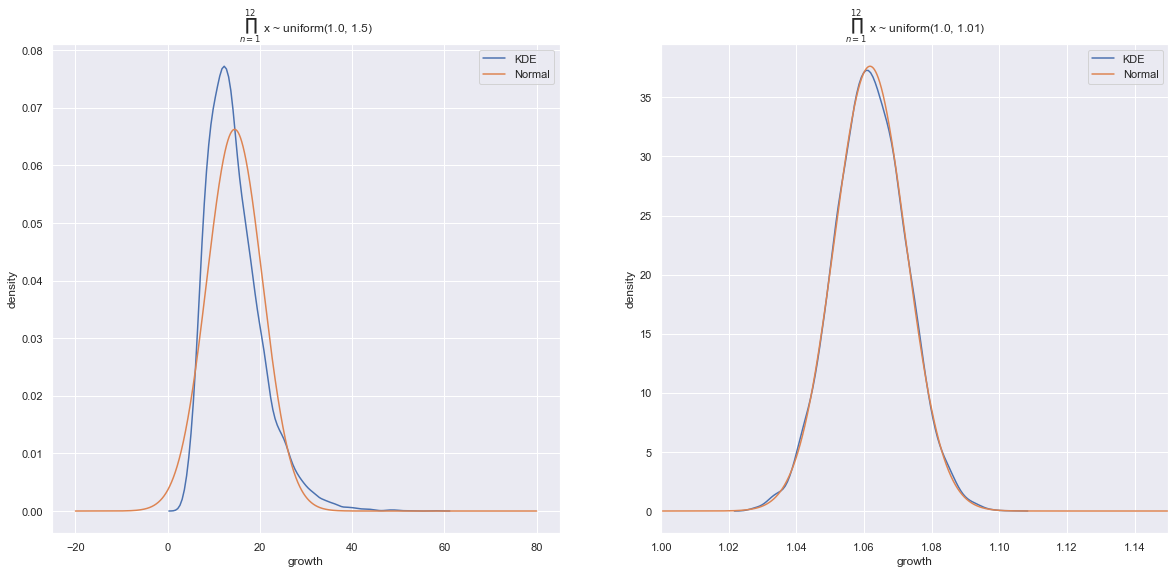

In [10]:
xs_big = np.linspace(-20.0, 80.0, 10000)
ys_big = stats.norm.pdf(xs_big, loc=np.mean(big), scale=np.std(big))
xs_small = np.linspace(1.0, 1.3, 10000)
ys_small = stats.norm.pdf(xs_small, loc=np.mean(small), scale=np.std(small))

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(20, 9)

sns.kdeplot(big, ax=ax1, label="KDE")
ax1.plot(xs_big, ys_big, label="Normal")
ax1.legend(loc=0)
ax1.set_xlabel("growth")
ax1.set_ylabel("density")
ax1.set_title("$\prod_{n=1}^{12}$ x ~ uniform(1.0, 1.5)", pad=12)

sns.kdeplot(small, ax=ax2, label="KDE")
ax2.plot(xs_small, ys_small, label="Normal")
ax2.set_xlim(1, 1.15)
ax2.legend(loc=0)
ax2.set_xlabel("growth")
ax2.set_ylabel("density")
ax2.set_title("$\prod_{n=1}^{12}$ x ~ uniform(1.0, 1.01)", pad=12);

### 4.5

In [11]:
log_big = np.log(np.random.uniform(1.0, 1.5, (12, 10000)).prod(axis=0))

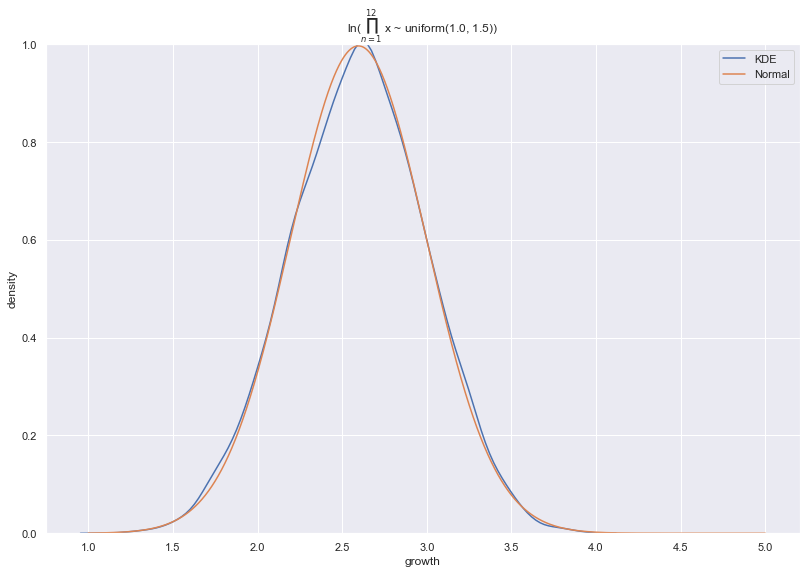

In [12]:
xs = np.linspace(1, 5, 10000)
ys = stats.norm.pdf(xs, loc=np.mean(log_big), scale=np.std(log_big))

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.kdeplot(log_big, ax=ax, label="KDE")
ax.plot(xs, ys, label="Normal")
ax.legend(loc=0)
ax.set_xlabel("growth")
ax.set_ylabel("density")
ax.set_title("ln($\prod_{n=1}^{12}$ x ~ uniform(1.0, 1.5))", pad=12);
ax.set_ylim(0, 1.0);

## A language for describing models

### 4.6

In [13]:
w = 6; n = 9
p_grid = np.linspace(0, 1, 100)
posterior = stats.binom.pmf(w, n, p=p_grid) * stats.uniform.pdf(p_grid, 0, 1)
posterior = posterior/sum(posterior)

## A Gaussian model of height

### 4.7

In [14]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)

### 4.8

In [15]:
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


### 4.9

In [16]:
(d.describe(percentiles=[0.055, 0.945])
 .loc[["mean", "std", "5.5%", "94.5%"]])

,height,weight,age,male
mean,138.263596,35.610618,29.344393,0.472426
std,27.602448,14.719178,20.746888,0.499699
5.5%,81.108550,9.360721,1.000000,0.000000
94.5%,165.735000,54.502894,66.135000,1.000000


### 4.10

In [17]:
d["height"].head()

0    151.765
1    139.700
2    136.525
3    156.845
4    145.415
Name: height, dtype: float64

### 4.11

In [18]:
d2 = d.loc[d["age"] >= 18]

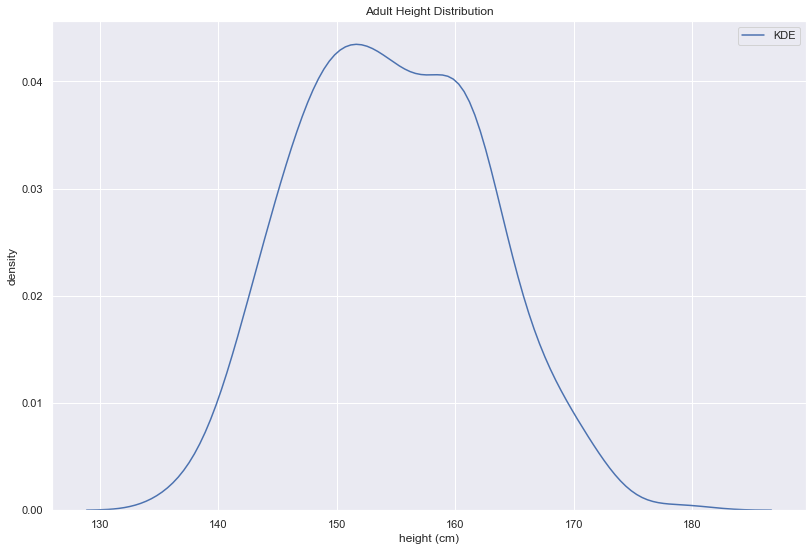

In [19]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.kdeplot(d2["height"], ax=ax, label="KDE")
ax.set_xlabel("height (cm)")
ax.set_ylabel("density")
ax.set_title("Adult Height Distribution");

### 4.12

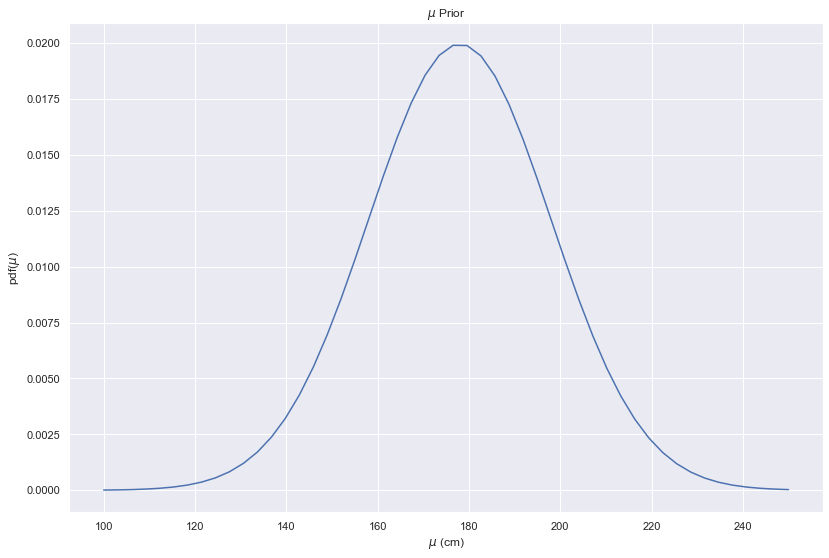

In [20]:
xs = np.linspace(100, 250)
ys = stats.norm.pdf(xs, 178, 20)

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(xs, ys)
ax.set_xlabel("$\mu$ (cm)")
ax.set_ylabel("pdf($\mu$)")
ax.set_title("$\mu$ Prior");

### 4.13

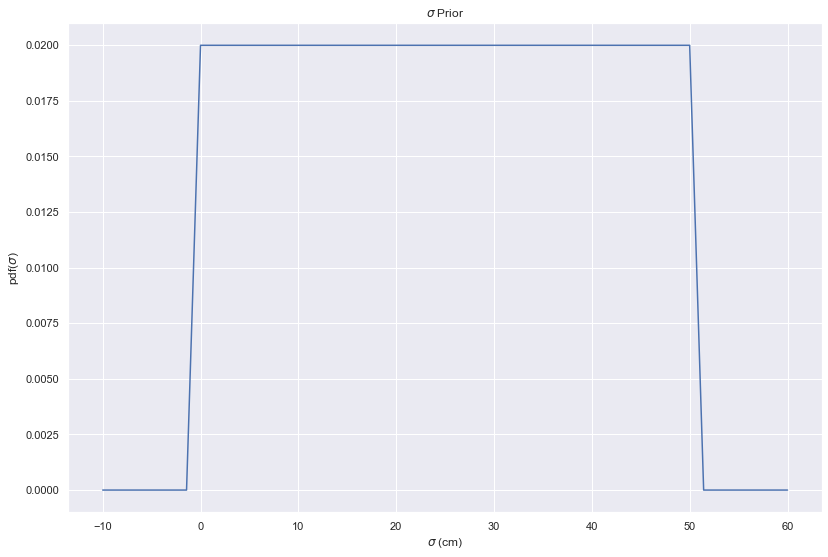

In [21]:
xs = np.linspace(-10, 60)
ys = stats.uniform.pdf(xs, 0, 50)

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(xs, ys)
ax.set_xlabel("$\sigma$ (cm)")
ax.set_ylabel("pdf($\sigma$)")
ax.set_title("$\sigma$ Prior");

### 4.14

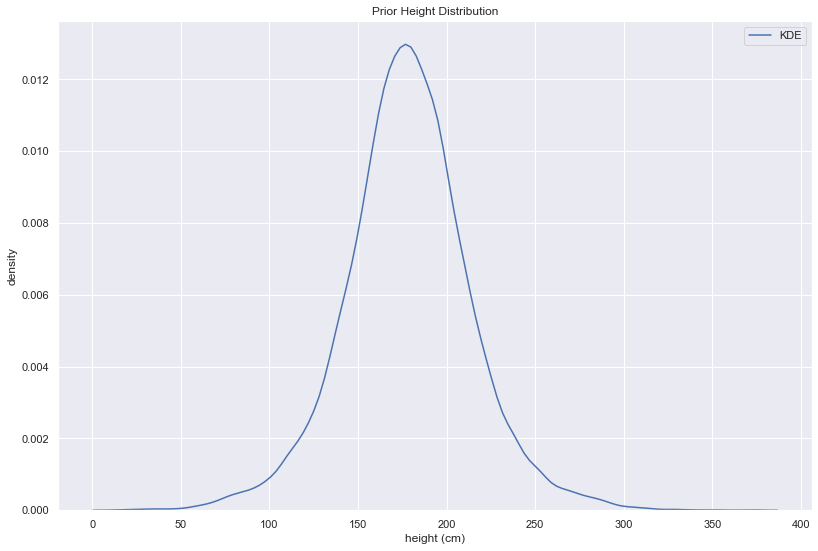

In [22]:
sample_mu = stats.norm.rvs(loc=178, scale=20, size=int(1e4))
sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=int(1e4))
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.kdeplot(prior_h, ax=ax, label="KDE")
ax.set_xlabel("height (cm)")
ax.set_ylabel("density")
ax.set_title("Prior Height Distribution");

### 4.15

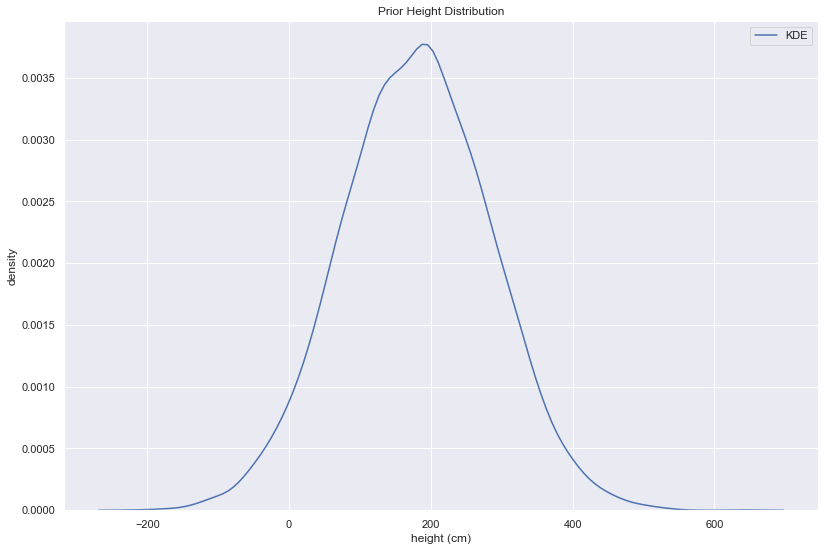

In [23]:
sample_mu = stats.norm.rvs(loc=178, scale=100, size=int(1e4))
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.kdeplot(prior_h, ax=ax, label="KDE")
ax.set_xlabel("height (cm)")
ax.set_ylabel("density")
ax.set_title("Prior Height Distribution");

### 4.16

In [24]:
mu_list = np.linspace(150, 160, 100)
sigma_list = np.linspace(7, 9, 100)
(mu_grid, sigma_grid) = np.meshgrid(mu_list, sigma_list)
post_ll = np.sum([stats.norm.logpdf(height, loc=mu_grid, scale=sigma_grid) 
                  for height in d2["height"]], axis=0)
post_prod = post_ll +\
            stats.norm.logpdf(mu_grid, loc=178, scale=20) +\
            stats.uniform.logpdf(sigma_grid, loc=0, scale=50)
post_prob = np.exp(post_prod - np.max(post_prod))
post_prob = post_prob/post_prob.sum()

### 4.17

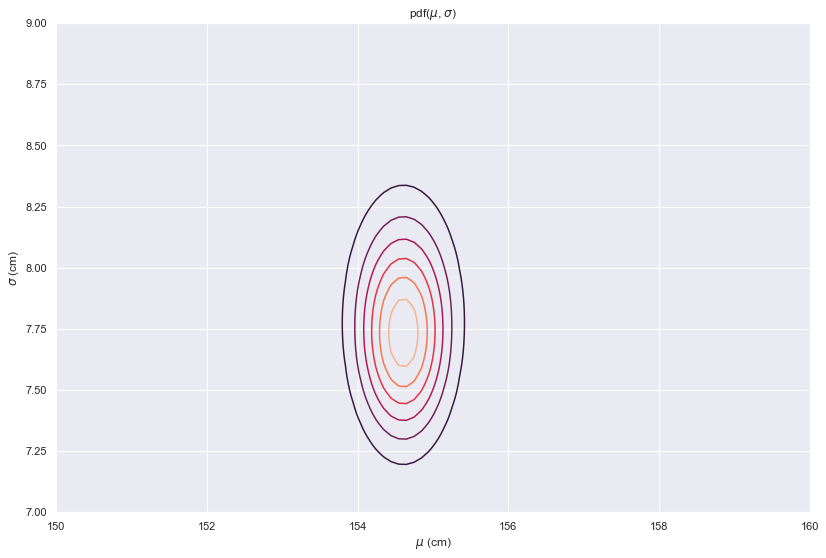

In [25]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.set_title("pdf($\mu$, $\sigma$)")
ax.set_xlabel("$\mu$ (cm)")
ax.set_ylabel("$\sigma$ (cm)")
ax.contour(mu_grid, sigma_grid, post_prob);

### 4.18

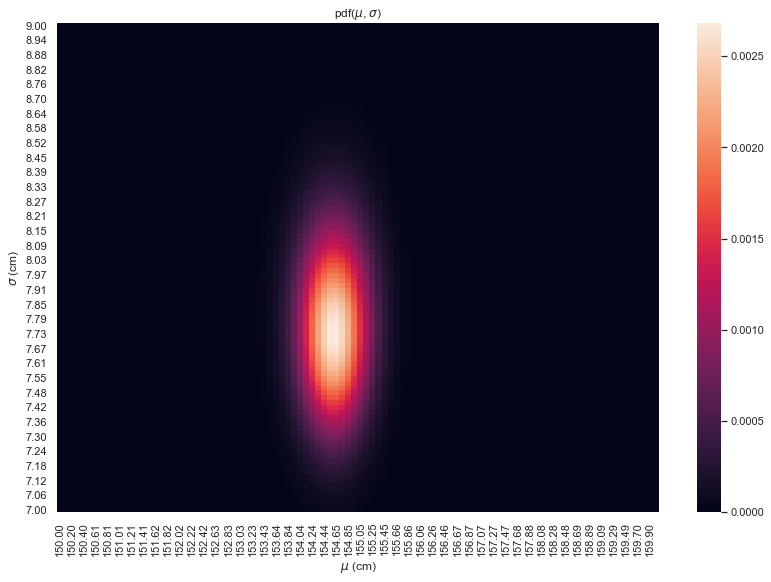

In [26]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
data = pd.DataFrame(post_prob, index=sigma_list, columns=mu_list)
sns.heatmap(data, ax=ax)
ax.set_title("pdf($\mu$, $\sigma$)")
ax.set_xlabel("$\mu$ (cm)")
ax.set_ylabel("$\sigma$ (cm)")
ax.set_xticklabels(["{:.2f}".format(float(l.get_text())) for l in ax.get_xticklabels()])
ax.set_yticklabels(["{:.2f}".format(float(l.get_text())) for l in ax.get_yticklabels()])
ax.invert_yaxis();

### 4.19

In [27]:
idxs = np.random.choice(np.arange(len(mu_list)*len(sigma_list)),
                        size=int(1e4),
                        p=post_prob.reshape(len(mu_list)*len(sigma_list)))
sample_mu = mu_list[idxs//len(mu_list)]
sample_sigma = sigma_list[np.mod(idxs, len(sigma_list))]

### 4.20

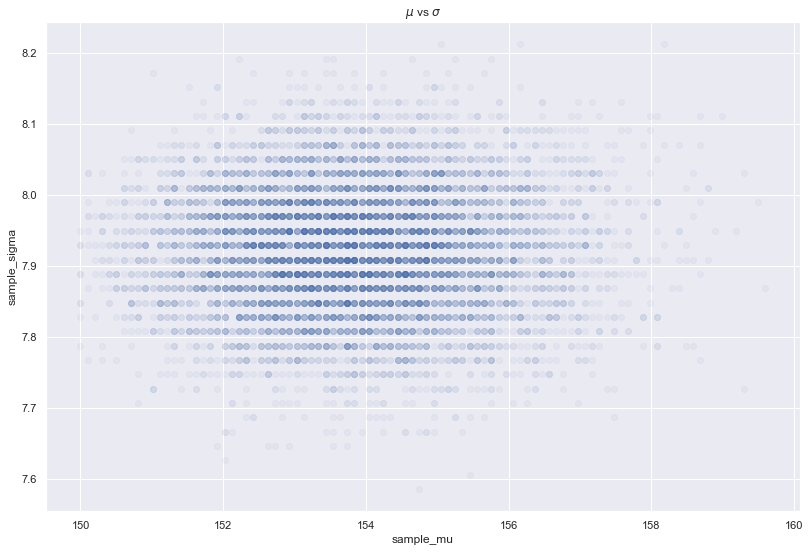

In [28]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(sample_mu, sample_sigma, "o", alpha=0.05)
ax.set_xlabel("sample_mu")
ax.set_ylabel("sample_sigma")
ax.set_title("$\mu$ vs $\sigma$");

### 4.21

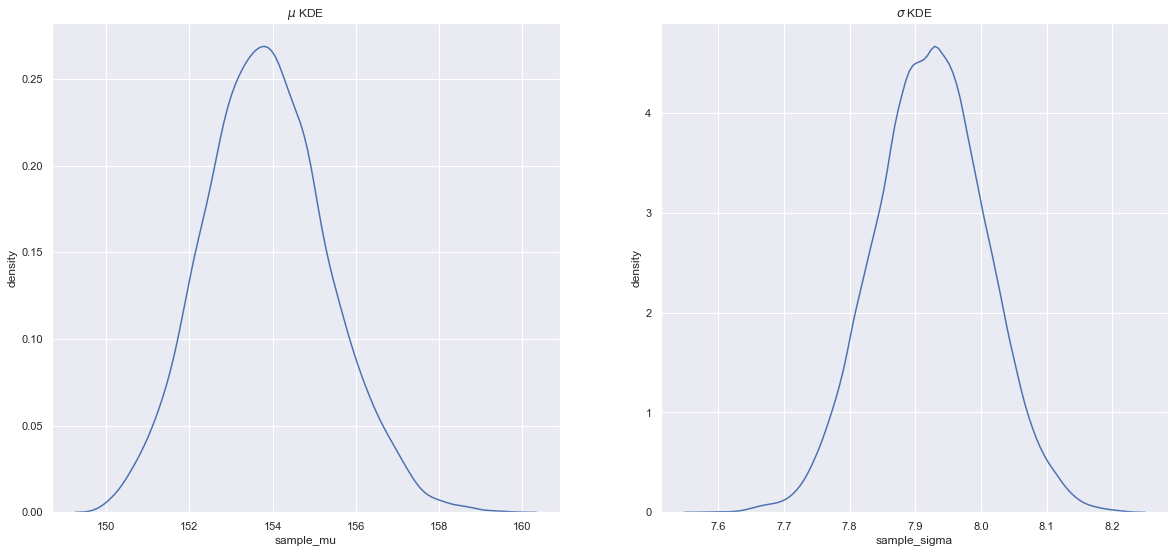

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(20, 9)
sns.kdeplot(sample_mu, ax=ax1)
sns.kdeplot(sample_sigma, ax=ax2)
ax1.set_xlabel("sample_mu")
ax1.set_ylabel("density")
ax1.set_title("$\mu$ KDE")
ax2.set_xlabel("sample_sigma")
ax2.set_ylabel("density")
ax2.set_title("$\sigma$ KDE");

### 4.22

In [30]:
pm.hpd(sample_mu), pm.hpd(sample_sigma)

(array([150.80808081, 156.56565657]), array([7.78787879, 8.11111111]))

### 4.23

In [31]:
d3 = np.random.choice(d2["height"], 20)

### 4.24

In [32]:
mu_list2 = np.linspace(150, 170, 200)
sigma_list2 = np.linspace(4, 20, 200)
(mu_grid2, sigma_grid2) = np.meshgrid(mu_list2, sigma_list2)
post_ll2 = np.sum([stats.norm.logpdf(height, loc=mu_grid2, scale=sigma_grid2) 
                   for height in d3], axis=0)
post_prod2 = post_ll2 +\
             stats.norm.logpdf(mu_grid2, loc=178, scale=20) +\
             stats.uniform.logpdf(sigma_grid2, loc=0, scale=50)
post_prob2 = np.exp(post_prod2 - np.max(post_prod2))
post_prob2 = post_prob2/post_prob2.sum()

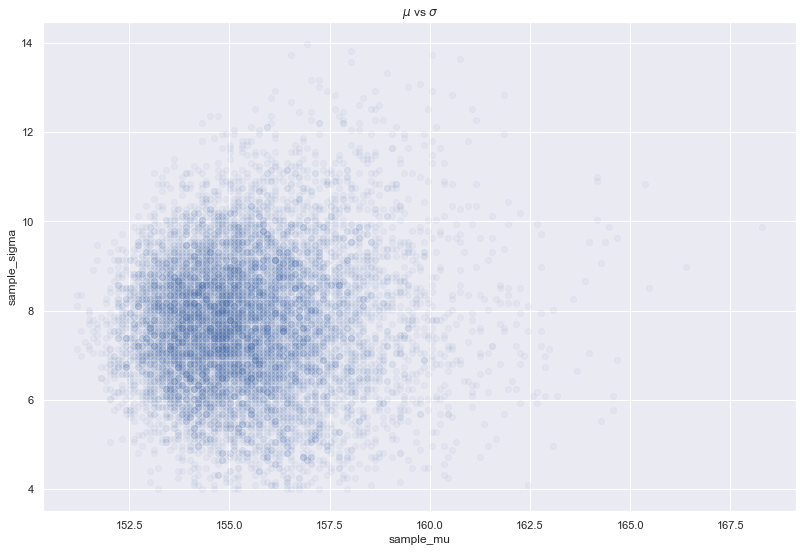

In [33]:
idxs = np.random.choice(np.arange(len(mu_list2)*len(sigma_list2)),
                        size=int(1e4),
                        p=post_prob2.reshape(len(mu_list2)*len(sigma_list2)))
sample_mu2 = mu_list2[idxs//len(mu_list2)]
sample_sigma2 = sigma_list2[np.mod(idxs, len(sigma_list2))]

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(sample_mu2, sample_sigma2, "o", alpha=0.05)
ax.set_xlabel("sample_mu")
ax.set_ylabel("sample_sigma")
ax.set_title("$\mu$ vs $\sigma$");

### 4.25

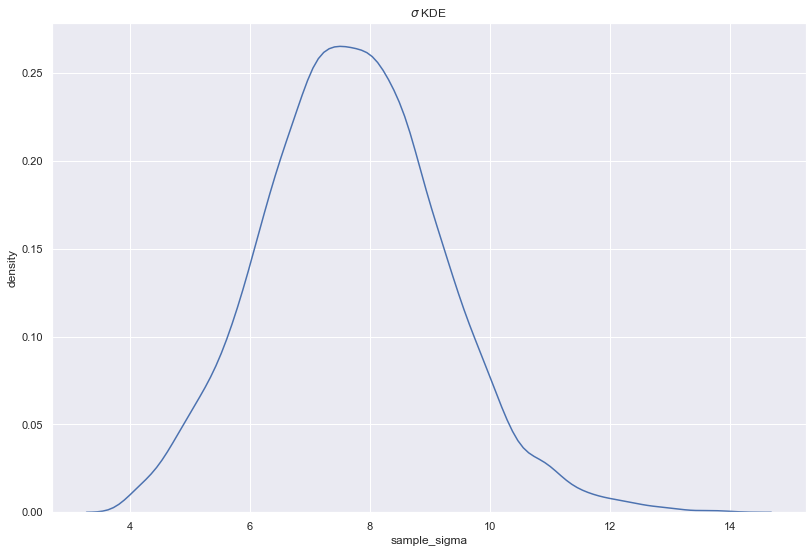

In [34]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.kdeplot(sample_sigma2, ax=ax)
ax.set_xlabel("sample_sigma")
ax.set_ylabel("density")
ax.set_title("$\sigma$ KDE");

### 4.26

In [35]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d[d["age"] >= 18]

### 4.27

In [36]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2["height"])

### 4.28

Since I'm using the PyMC3's [recommended implementation](https://github.com/pymc-devs/resources/blob/master/Rethinking/Chp_04.ipynb) for this book, I'll follow their lead in switching directly to MCMC.

In [37]:
with m4_1:
    trace_4_1 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:01<00:00, 4609.20draws/s]


### 4.29

Since these values are estimated from samples, the values will be slightly different from those given by `find_MAP`

In [38]:
pm.summary(trace_4_1, alpha=0.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,154.61,0.42,0.01,153.95,155.29,4521.19,1.0
sigma,7.77,0.30,0.00,7.30,8.25,4143.08,1.0


### 4.30

In [39]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20, testval=d2["height"].mean())
    sigma = pm.Uniform('sigma', lower=0, upper=50, testval=d2["height"].std())
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2["height"])

In [40]:
with m4_1:
    trace_4_1 = pm.sample(1000, tune=1000)

pm.summary(trace_4_1, alpha=0.11).round(2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:01<00:00, 4507.59draws/s]


,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,154.60,0.42,0.01,153.96,155.28,4299.51,1.0
sigma,7.77,0.30,0.00,7.28,8.22,3868.04,1.0


### 4.31

In [41]:
with pm.Model() as m4_2:
    mu = pm.Normal('mu', mu=178, sd=0.1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2["height"])
    trace_4_2 = pm.sample(1000, tune=1000)

pm.summary(trace_4_2, alpha=0.11).round(2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:01<00:00, 4569.08draws/s]


,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,177.86,0.10,0.00,177.70,178.02,3909.54,1.0
sigma,24.62,0.91,0.01,23.21,26.10,3866.20,1.0


### 4.32

In [42]:
trace_df = pm.trace_to_dataframe(trace_4_1)
trace_df.cov()

,mu,sigma
mu,0.174106,0.002270
sigma,0.002270,0.088641


### 4.33

In [43]:
print(np.diag(trace_df.cov()))
print(trace_df.corr())

[0.17410569 0.08864119]
             mu     sigma
mu     1.000000  0.018275
sigma  0.018275  1.000000


### 4.34

In [44]:
post = pm.sampling.sample_posterior_predictive(trace_4_1, int(1e4), m4_1, var_names=["mu", "sigma"])
post = pd.DataFrame(post)
post.head()

100%|██████████| 10000/10000 [00:00<00:00, 47413.73it/s]


,mu,sigma
0,154.107533,7.686662
1,154.902820,7.642330
2,154.846688,8.009231
3,155.052180,7.575392
4,154.589607,7.592985


### 4.35

In [45]:
(post.describe(percentiles=[0.055, 0.945])
 .loc[["mean", "std", "5.5%", "94.5%"]])

,mu,sigma
mean,154.599696,7.770814
std,0.418510,0.296416
5.5%,153.916535,7.314858
94.5%,155.252454,8.264584


### 4.36

That's not what's happening in `pm.sampling.sample_posterior_predictive` but here's the Python version anyway

In [46]:
stats.multivariate_normal.rvs(mean=post.mean(), cov=post.cov(), size=10)

array([[155.13937209,   7.49804186],
       [154.83870144,   8.13408335],
       [154.52778671,   8.27620444],
       [154.52680956,   8.08450453],
       [154.04124645,   7.99708624],
       [154.05673708,   7.8861487 ],
       [155.13084794,   8.02340852],
       [154.30266643,   7.87955341],
       [155.01445326,   8.09621269],
       [154.02426033,   7.42962469]])

## Linear Prediction

### 4.37

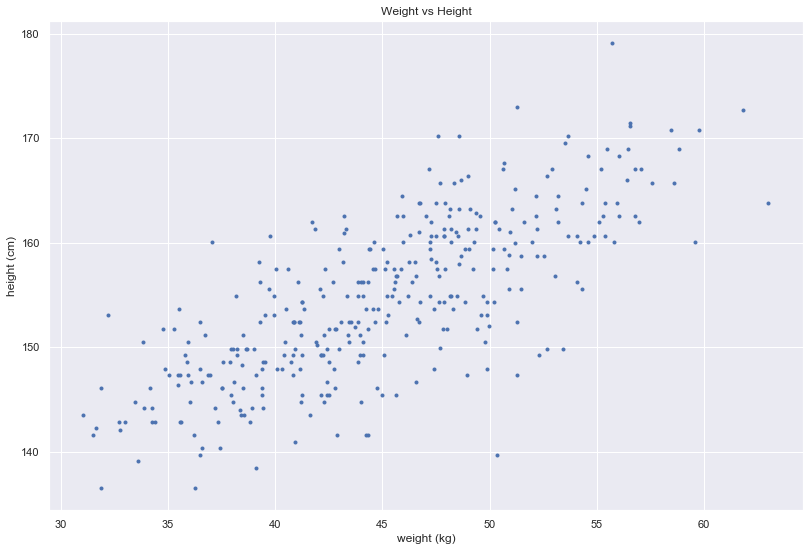

In [47]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d[d["age"] >= 18]
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d2["weight"], d2["height"], ".")
ax.set_xlabel("weight (kg)")
ax.set_ylabel("height (cm)")
ax.set_title("Weight vs Height");

### 4.38

In [48]:
np.random.seed(2971)
N = 100
a = stats.norm.rvs(178, 20, N)
b = stats.norm.rvs(0, 10, N)

### 4.39

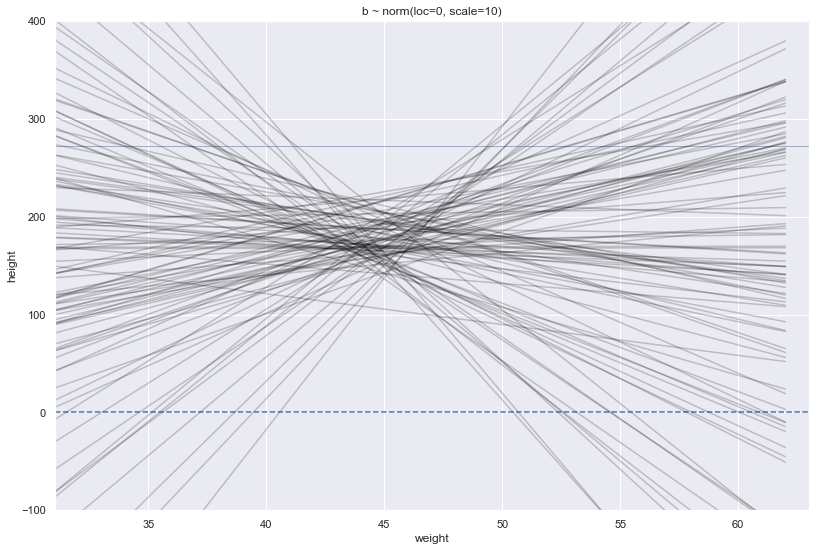

In [49]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.set_xlim(d2["weight"].min(), d2["weight"].max())
ax.set_ylim(-100, 400)
ax.set_xlabel("weight")
ax.set_ylabel("height")
ax.set_title("b ~ norm(loc=0, scale=10)")
ax.axhline(y=0, linestyle="--")
ax.axhline(y=272, linewidth=0.5)

xbar = d2["weight"].mean()
xs = range(int(d2["weight"].min().round()),
           int(d2["weight"].max().round()))

for a_i, b_i in zip(a, b):
    ys = [a_i + b_i*(x - xbar) for x in xs]
    ax.plot(xs, ys, "black", alpha=0.2);

### 4.40

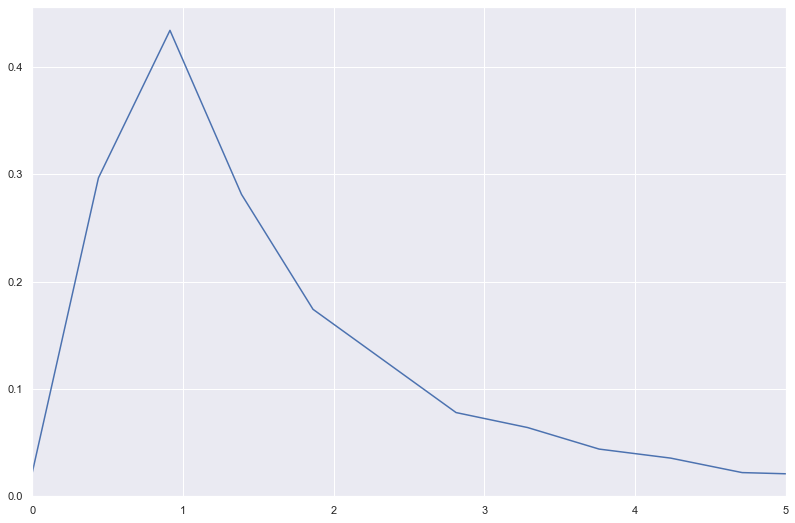

In [50]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html
b = stats.lognorm.rvs(s=1, scale=np.exp(0), size=int(1e4))
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.kdeplot(b);
ax.set_xlim(0, 5);

### 4.41

In [51]:
np.random.seed(2971)
N = 100
a = stats.norm.rvs(178, 20, N)
b = stats.lognorm.rvs(s=1, scale=np.exp(0), size=N)

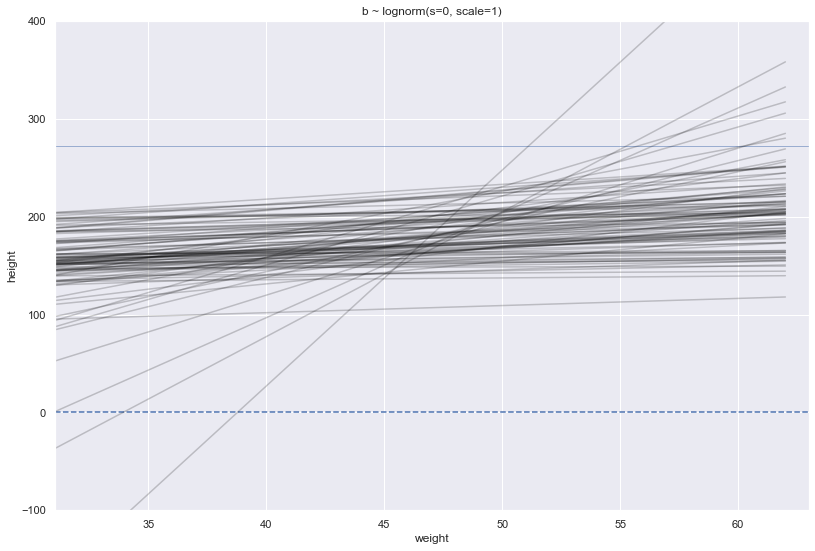

In [52]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.set_xlim(d2["weight"].min(), d2["weight"].max())
ax.set_ylim(-100, 400)
ax.set_xlabel("weight")
ax.set_ylabel("height")
ax.set_title("b ~ lognorm(s=0, scale=1)")
ax.axhline(y=0, linestyle="--")
ax.axhline(y=272, linewidth=0.5)

xbar = d2["weight"].mean()
xs = range(int(d2["weight"].min().round()),
           int(d2["weight"].max().round()))

for a_i, b_i in zip(a, b):
    ys = [a_i + b_i*(x - xbar) for x in xs]
    ax.plot(xs, ys, "black", alpha=0.2);

#### 4.42

In [53]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d[d["age"] >= 18]

xbar = d2["weight"].mean()

with pm.Model() as m4_3:
    sigma = pm.Uniform("sigma", 0, 50)    
    a = pm.Normal("a", mu=178, sigma=20)
    b = pm.Lognormal("b", mu=0, sigma=1)
    mu = a + b*(d2["weight"] - xbar)
    height = pm.Normal("height", mu=mu, sigma=sigma, observed=d2["height"])

### 4.43

In [54]:
with pm.Model() as m4_3b:
    sigma = pm.Uniform("sigma", 0, 50)    
    a = pm.Normal("a", mu=178, sigma=20)
    log_b = pm.Normal("log_b", mu=0, sigma=1)
    mu = a + np.exp(log_b)*(d2["weight"] - xbar)
    height = pm.Normal("height", mu=mu, sigma=sigma, observed=d2["height"])

### 4.44

In [55]:
with m4_3:
    trace_4_3 = pm.sample(1000, tune=1000)

pm.summary(trace_4_3, alpha=0.11, var_names=["a", "b", "sigma"]).round(2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a, sigma]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:02<00:00, 3794.21draws/s]


,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
a,154.61,0.27,0.0,154.17,155.04,5844.93,1.0
b,0.90,0.04,0.0,0.84,0.97,7029.32,1.0
sigma,5.10,0.19,0.0,4.81,5.42,5153.57,1.0


### 4.45

In [56]:
trace_df = pm.trace_to_dataframe(trace_4_3, varnames=["a", "b", "sigma"])
trace_df.cov()

,a,b,sigma
a,0.073006,0.000393,-0.000666
b,0.000393,0.001761,-0.000050
sigma,-0.000666,-0.000050,0.037882


### 4.46

100%|██████████| 1000/1000 [00:00<00:00, 43605.73it/s]


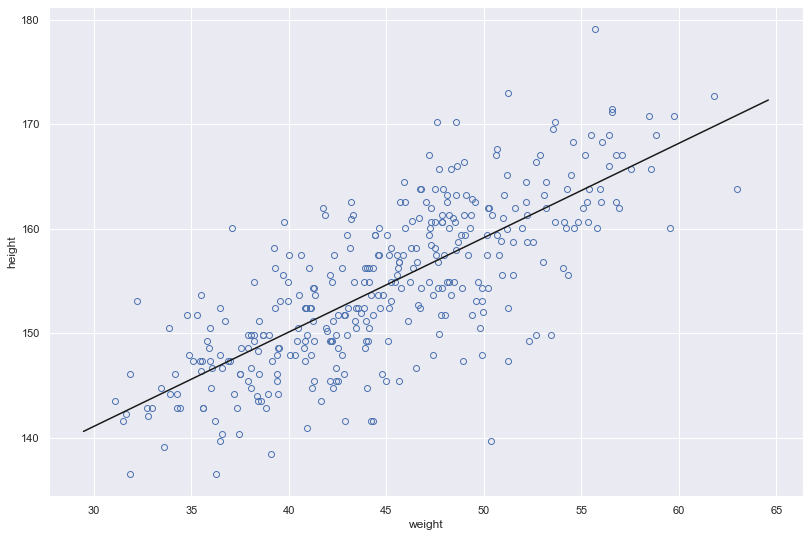

In [57]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.set_xlabel("weight")
ax.set_ylabel("height")
ax.plot(d2["weight"], d2["height"], "o", mec="b", mfc="None")
post = pm.sample_posterior_predictive(trace_4_3, 1000, m4_3, var_names=["a", "b"])
a_map = post["a"].mean()
b_map = post["b"].mean()
xs = ax.get_xlim()
ax.plot(xs, [a_map + b_map*(x - xbar) for x in xs], color="k");

### 4.47

In [58]:
post = pm.sample_posterior_predictive(trace_4_3, 5, m4_3, var_names=["a", "b", "sigma"])
pd.DataFrame(post)

100%|██████████| 5/5 [00:00<00:00, 4845.55it/s]


,a,b,sigma
0,154.790173,0.891951,4.870108
1,154.290917,0.959954,5.028448
2,154.610259,0.843702,5.181843
3,154.483230,0.998184,5.061617
4,154.702534,0.851233,5.217530


### 4.48

In [59]:
N = 10
dN = d2[:N]

with pm.Model() as mN:
    sigma = pm.Uniform("sigma", lower=0, upper=50)
    a = pm.Normal("a", mu=178, sigma=20)
    b = pm.Lognormal("b", mu=0, sigma=1)
    mu = a + b*(dN["weight"] - dN["weight"].mean())
    height = pm.Normal("height", mu=mu, sigma=sigma, observed=dN["height"])
    trace_N = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a, sigma]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:02<00:00, 3335.72draws/s]
The acceptance probability does not match the target. It is 0.8838087889612045, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6189185424460893, but should be close to 0.8. Try to increase the number of tuning steps.


### 4.49

100%|██████████| 20/20 [00:00<00:00, 15773.99it/s]


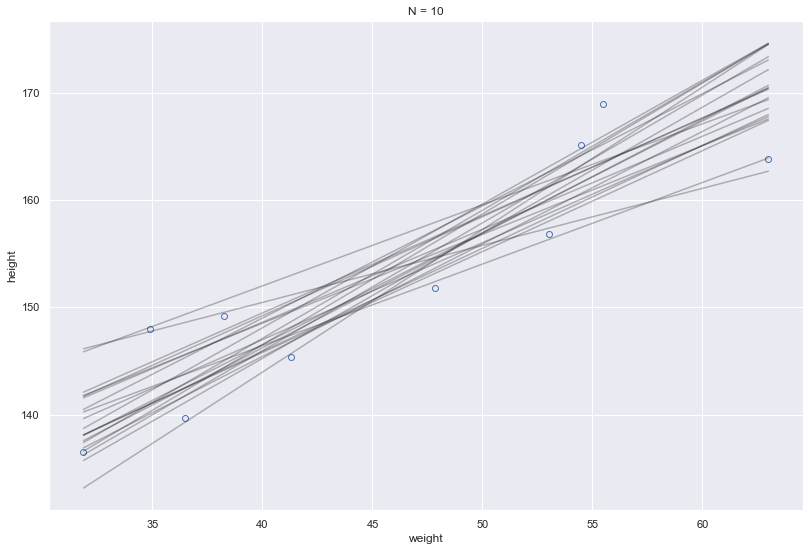

In [60]:
post = pm.sample_posterior_predictive(trace_N, 20, mN, var_names=["a", "b", "sigma"])

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.set_xlabel("weight")
ax.set_ylabel("height")
ax.set_title("N = {}".format(N))
ax.plot(dN["weight"], dN["height"], "o", mec="b", mfc="None")

xs = (dN["weight"].min(), dN["weight"].max())
for i in range(20):
    ax.plot(xs, [post["a"][i] + post["b"][i]*(x - xbar) for x in xs], color="k", alpha=0.3);

### 4.50

In [61]:
post = pm.sample_posterior_predictive(trace_4_3, 1000, m4_3, var_names=["a", "b", "sigma"])
mu_at_50 = post["a"] + post["b"] * (50 - xbar)

100%|██████████| 1000/1000 [00:00<00:00, 36374.16it/s]


### 4.51

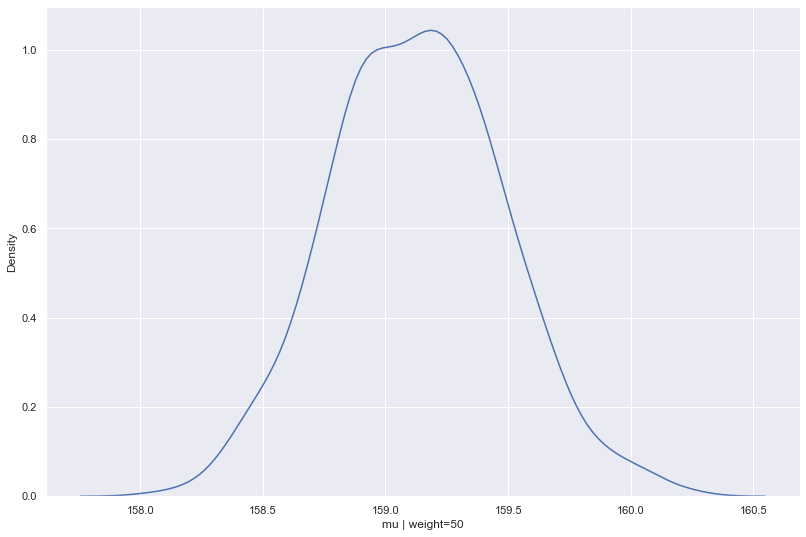

In [62]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.kdeplot(mu_at_50, ax=ax)
ax.set_xlabel("mu | weight=50")
ax.set_ylabel("Density");

### 4.52

In [63]:
pm.hpd(mu_at_50, alpha=0.11)

array([158.58416143, 159.69694549])

### 4.53

A shared variable that can be set later is the best way I've found to do this

In [64]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d.loc[d["age"] >= 18]

with pm.Model() as m4_3:
    weight = pm.Data("weight", d2["weight"])
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b = pm.Normal("b", mu=0, sd=10)
    a = pm.Normal("a", mu=156, sd=100)
    mu = pm.Deterministic("mu", a + b*weight)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2["height"])
    trace_4_3 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, sigma]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:06<00:00, 1256.92draws/s]


In [65]:
mu = pm.sample_posterior_predictive(trace_4_3, 1000, m4_3, var_names=["mu"])["mu"]
mu.shape

100%|██████████| 1000/1000 [00:00<00:00, 4004.74it/s]


(1000, 352)

### 4.54

In [66]:
weight_seq = np.arange(25, 71)
pm.set_data({"weight": weight_seq}, m4_3)
mu = pm.sample_posterior_predictive(trace_4_3, 1000, m4_3, var_names=["mu"])["mu"]
mu.shape

100%|██████████| 1000/1000 [00:00<00:00, 4099.60it/s]


(1000, 46)

### 4.55

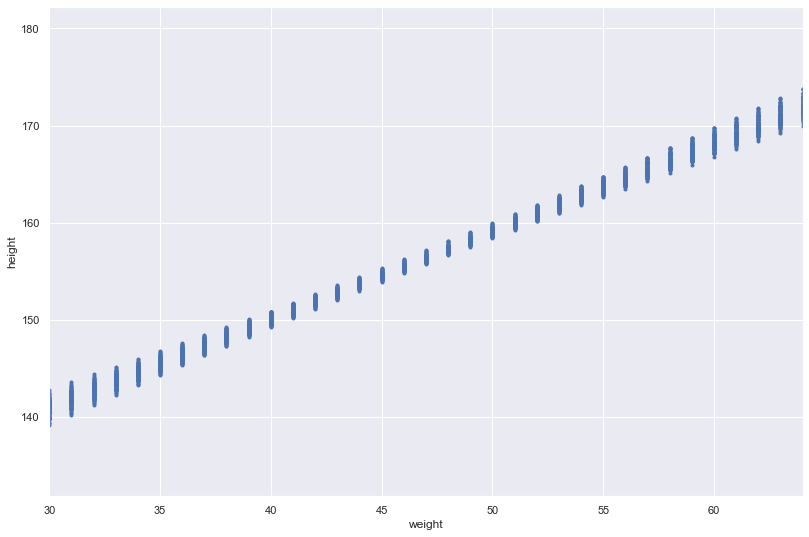

In [67]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(weight_seq, mu[:100].T, "C0.")
ax.set_xlabel("weight")
ax.set_ylabel("height")
ax.set_xlim(30, 64);

### 4.56

In [68]:
mu_mean = mu.mean(axis=0)
mu_hpdi = pm.hpd(mu, alpha=.11)

### 4.57

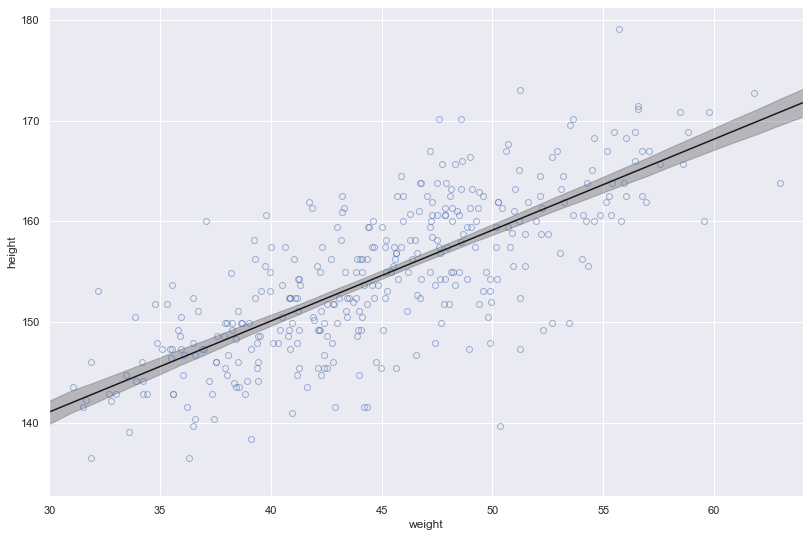

In [69]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d2["weight"], d2["height"], "o", mec="b", mfc="None", alpha=0.5)
ax.plot(weight_seq, mu_mean, color="k")
ax.fill_between(weight_seq, mu_hpdi[:,0], mu_hpdi[:,1], alpha=0.25, color="k")
ax.set_xlabel("weight")
ax.set_ylabel("height")
ax.set_xlim(30, 64);

### 4.58

That's probably what pymc is doing under the hood

In [70]:
# The values for mu are close but not the same as what I get from pm.sample_posterior_predictive
post = pm.sample_posterior_predictive(trace_4_3, 1000, m4_3, var_names=["a", "b"])
weight_seq = np.arange(24, 70) # for consistency
mu = np.array([post["a"] + post["b"]*(weight - xbar) for weight in weight_seq])
mu_mean = mu.mean(axis=1)
mu_ci = pm.hpd(mu.T, alpha=0.11)

100%|██████████| 1000/1000 [00:00<00:00, 38603.81it/s]


### 4.59

In [71]:
sim_height = pm.sample_posterior_predictive(trace_4_3, 1000, m4_3)["height"]
sim_height.shape

100%|██████████| 1000/1000 [00:01<00:00, 553.92it/s]


(1000, 46)

### 4.60

In [72]:
height_pi = pm.hpd(sim_height, alpha=0.11)
height_pi.shape

(46, 2)

### 4.61

In [73]:
# Resampling all variables
samples = pm.sample_posterior_predictive(trace_4_3, 1000, m4_3, var_names=["mu", "height"])
mu_mean = samples["mu"].mean(axis=0)
mu_hpdi = pm.hpd(samples["mu"], alpha=0.11)
height_hpdi = pm.hpd(samples["height"], alpha=0.11)

100%|██████████| 1000/1000 [00:01<00:00, 582.97it/s]


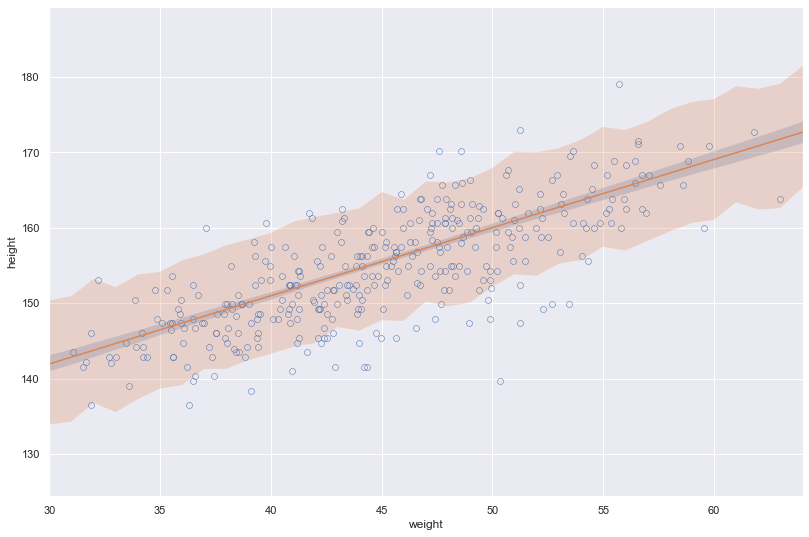

In [74]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d2["weight"], d2["height"], "o", mew=0.5, mec="b", mfc="None")
ax.plot(weight_seq, mu_mean)
ax.fill_between(weight_seq, mu_hpdi[:,0], mu_hpdi[:,1], alpha=0.25);
ax.fill_between(weight_seq, height_hpdi[:,0], height_hpdi[:,1], alpha=0.25);
ax.set_xlabel("weight")
ax.set_ylabel("height")
ax.set_xlim(30, 64);

### 4.62

In [75]:
sim_height = pm.sample_posterior_predictive(trace_4_3, int(1e4), m4_3)["height"]
height_pi = pm.hpd(sim_height, alpha=0.11)

100%|██████████| 10000/10000 [00:18<00:00, 539.67it/s]


### 4.63

In [76]:
# Same as when calculating mu by hand, the numbers seem off
post = pm.sample_posterior_predictive(trace_4_3, 1000, m4_3, var_names=["a", "b", "sigma"])
weight_seq = np.arange(25, 70)
sim_height = stats.norm.rvs(loc=[post["a"] + post["b"]*(weight - xbar) for weight in weight_seq],
                            scale=post["sigma"])
height_pi = pm.hpd(sim_height.T)

100%|██████████| 1000/1000 [00:00<00:00, 35848.75it/s]


## Curves from Lines

### 4.64

In [77]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


### 4.65

In [78]:
d["weight_s"] = (d["weight"] - d["weight"].mean())/d["weight"].std()
d["weight_s2"] = d["weight_s"]**2

with pm.Model() as m4_5:
    weight_s = pm.Data("weight_s", d["weight_s"])
    weight_s2 = pm.Data("weight_s2", d["weight_s2"])
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b2 = pm.Normal("b2", mu=0, sd=1)
    b1 = pm.Lognormal("b1", mu=0, sd=1)
    a = pm.Normal("a", mu=178, sd=20)
    mu = pm.Deterministic("mu", a + b1*weight_s + b2*weight_s2)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d["height"])
    trace_4_5 = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b1, b2, sigma]
Sampling 4 chains: 100%|██████████| 44000/44000 [00:15<00:00, 2836.07draws/s]


### 4.66

In [79]:
pm.summary(trace_4_5, alpha=0.11, var_names=["a", "b1", "b2", "sigma"]).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
a,146.05,0.37,0.0,145.46,146.65,21829.47,1.0
b1,21.74,0.29,0.0,21.27,22.20,27857.77,1.0
b2,-7.80,0.28,0.0,-8.25,-7.37,21563.28,1.0
sigma,5.81,0.18,0.0,5.52,6.09,32308.55,1.0


### 4.67

In [80]:

weight_seq = np.linspace(-2.2, 2, 30)
pm.set_data({"weight_s": weight_seq,
             "weight_s2": weight_seq**2}, 
            m4_5)
samples = pm.sample_posterior_predictive(trace_4_5, 1000, m4_5, var_names=["mu", "height"])
mu_mean = samples["mu"].mean(axis=0)
mu_pi = pm.hpd(samples["mu"], alpha=0.11)
height_pi = pm.hpd(samples["height"], alpha=0.11)

100%|██████████| 1000/1000 [00:02<00:00, 446.56it/s]


### 4.68

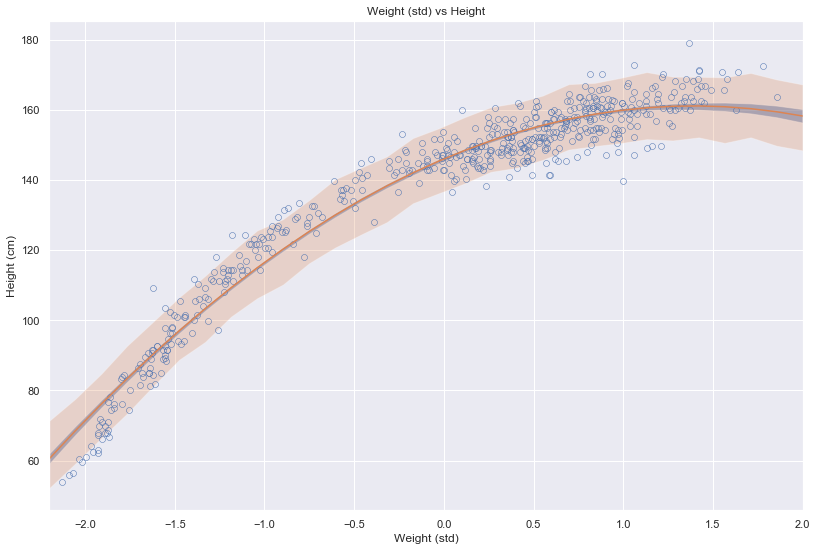

In [81]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d["weight_s"], d["height"], "o", mew=0.5, mec="b", mfc="None")
ax.plot(weight_seq, mu_mean)
ax.fill_between(weight_seq, mu_pi[:,0], mu_pi[:,1], alpha=0.50);
ax.fill_between(weight_seq, height_pi[:,0], height_pi[:,1], alpha=0.25);
ax.set_title("Weight (std) vs Height")
ax.set_xlabel("Weight (std)")
ax.set_ylabel("Height (cm)")
ax.set_xlim(-2.2, 2);

### 4.69

In [82]:
d["weight_s3"] = d["weight_s"]**3

with pm.Model() as m4_5:
    weight_s = pm.Data("weight_s", d["weight_s"])
    weight_s2 = pm.Data("weight_s2", d["weight_s2"])
    weight_s3 = pm.Data("weight_s3", d["weight_s3"])
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b3 = pm.Normal("b3", mu=0, sd=1)
    b2 = pm.Normal("b2", mu=0, sd=1)
    b1 = pm.Lognormal("b1", mu=0, sd=1)
    a = pm.Normal("a", mu=178, sd=20)
    mu = pm.Deterministic("mu", a + b1*weight_s + b2*weight_s2 + b3*weight_s3)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d["height"])
    trace_4_5 = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b1, b2, b3, sigma]
Sampling 4 chains: 100%|██████████| 44000/44000 [00:27<00:00, 1605.99draws/s]


### 4.70 - 4.71

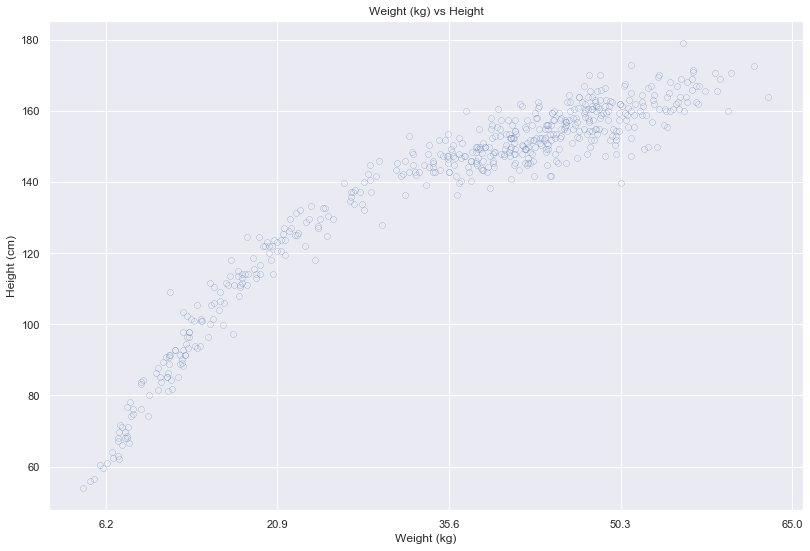

In [83]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d["weight_s"], d["height"], "o", mew=0.2, mec="b", mfc="None")
at = np.arange(-2, 3)
ax.set_xticks(at)
ax.set_xticklabels(np.round(at * d.weight.std() + d.weight.mean(), 1))
ax.set_title("Weight (kg) vs Height")
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Height (cm)");

### 4.72

In [84]:
d = pd.read_csv('data/cherry_blossoms.csv', sep=';', header=0)
(d.describe(percentiles=[0.055, 0.945])
 .loc[["mean", "std", "5.5%", "94.5%"]])

,year,doy,temp,temp_upper,temp_lower
mean,1408.000000,104.540508,6.141886,7.185151,5.098941
std,350.884596,6.407036,0.663648,0.992921,0.850350
5.5%,867.770000,94.430000,5.150000,5.897650,3.787650
94.5%,1948.230000,115.000000,7.294700,8.902350,6.370000


### 4.73

In [85]:
d2 = d.dropna(subset=["doy"])
num_knots = 15
knot_list = np.quantile(d2["year"], np.linspace(0, 1, num_knots))

### 4.74

Directly implemented from [here](https://github.com/pymc-devs/resources/blob/master/Rethinking_2/Chp_04.ipynb)

In [86]:
from patsy import dmatrix
B = dmatrix(
    "bs(year, knots=knots, degree=3, include_intercept=True) - 1",
    {"year": d2["year"].values, "knots": knot_list[1:-1]},
)

### 4.75

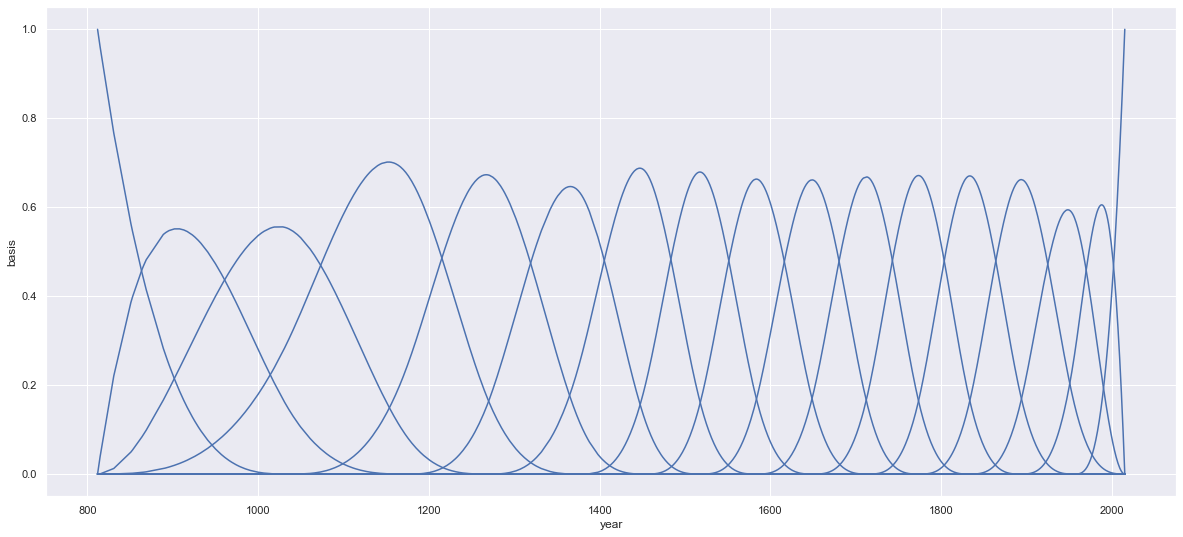

In [87]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(20.25, 9)
for i in range(17):
    ax.plot(d2["year"], (B[:, i]), color="C0")
ax.set_xlabel("year")
ax.set_ylabel("basis");

### 4.76

In [88]:
with pm.Model() as m4_7:
    a = pm.Normal("a", 100, 10)
    w = pm.Normal("w", mu=0, sd=10, shape=B.shape[1])
    mu = pm.Deterministic("mu", a + pm.math.dot(B.base, w))
    sigma = pm.Exponential("sigma", 1)
    D = pm.Normal("D", mu, sigma, observed=d2["doy"])
    trace_4_7 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, w, a]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:10<00:00, 581.14draws/s]
The acceptance probability does not match the target. It is 0.884018797709036, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


### 4.77

100%|██████████| 1000/1000 [00:00<00:00, 41000.04it/s]


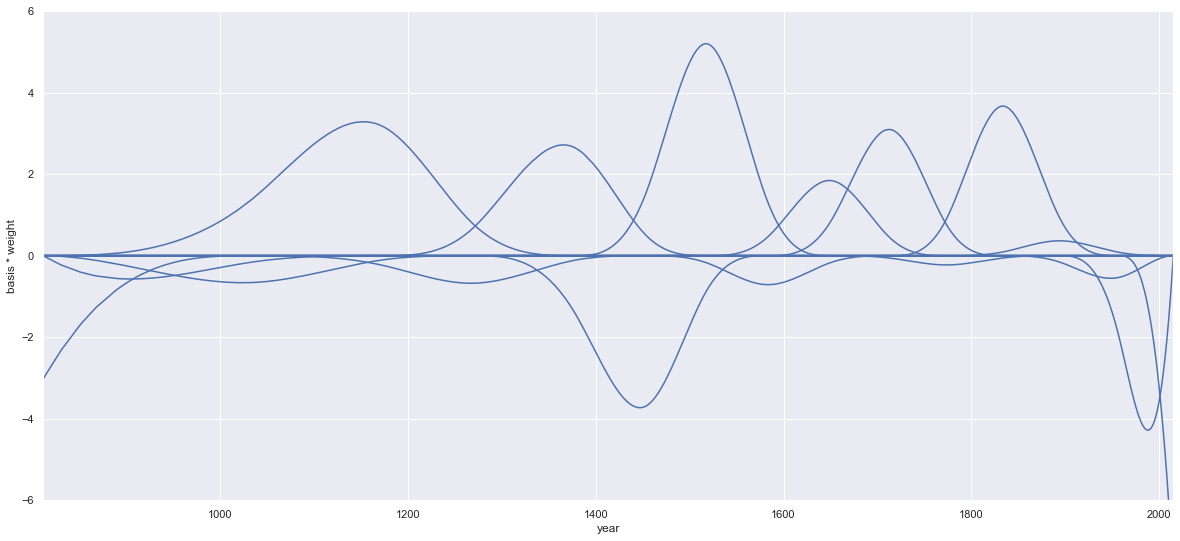

In [89]:
post = pm.sample_posterior_predictive(trace_4_7, 1000, m4_7, var_names=["w"])
w = post["w"].mean(axis=0)
f, ax = plt.subplots(1, 1)
f.set_size_inches(20.25, 9)
ax.set_xlim((d2["year"].min(), d2["year"].max()))
ax.set_ylim((-6, 6))
ax.set_xlabel("year")
ax.set_ylabel("basis * weight")
for i in range(B.shape[1]):
    ax.plot(d2["year"], w[i]*B[:, i], color="C0");

### 4.78

100%|██████████| 1000/1000 [00:00<00:00, 3879.85it/s]


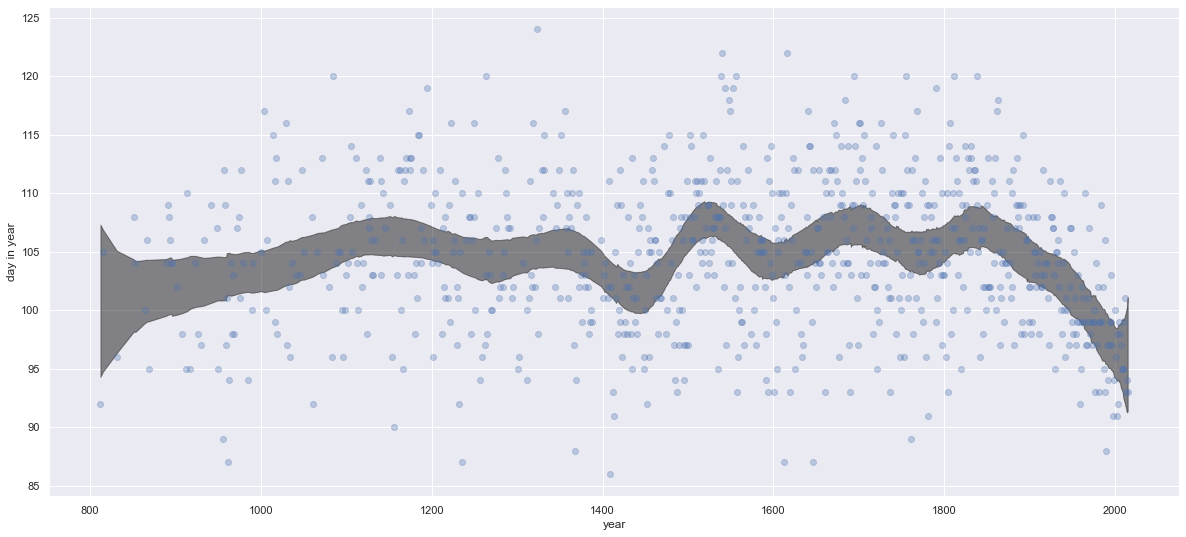

In [90]:
mu = pm.sample_posterior_predictive(trace_4_7, 1000, m4_7, var_names=["mu"])["mu"]
mu_pi = pm.hpd(mu, alpha=0.03)
f, ax = plt.subplots(1, 1)
f.set_size_inches(20.25, 9)
ax.plot(d2["year"], d2["doy"], "o", alpha=0.3);
ax.fill_between(d2["year"], mu_pi[:,0], mu_pi[:,1], alpha=0.50, color="k");
ax.set_xlabel("year")
ax.set_ylabel("day in year");

### Practice

### Easy

#### 4E1.

$y_i \sim Normal(\mu, \sigma)$

#### 4E2.

There are 2 parameters in the posterior distribution, $\mu$ and $\sigma$

#### 4E3.

$P(\mu, \sigma | y_i) = \frac{P(y_i | \mu, \sigma)\times P(\mu, \sigma)}{\int P(y_i | d \mu, d \sigma)}$

#### 4E4.

$\mu_{i} = \alpha + \beta x_{i}$

#### 4E5.

There are 3 parameters in the posterior distribution, $\alpha$, $\beta$ and $\sigma$

### Medium

#### 4M1.

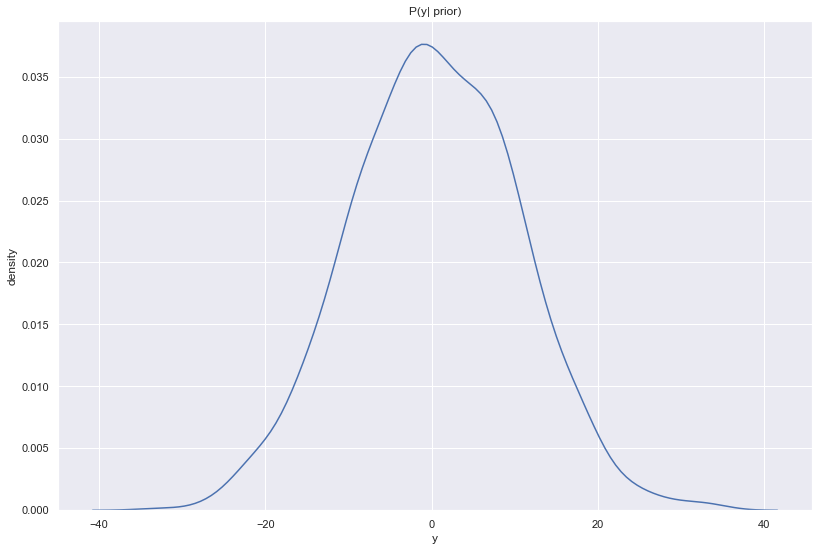

In [91]:
with pm.Model() as m_4m1:
    sigma = pm.Exponential("sigma", lam=1)
    mu = pm.Normal("mu", mu=0, sd=10)
    y = pm.Normal("y", mu=mu, sd=sigma)
    
y = pm.sample_prior_predictive(1000, m_4m1, var_names=["y"])["y"]
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.50, 9)
sns.distplot(y, hist=False)
ax.set_xlabel("y")
ax.set_ylabel("density")
ax.set_title("P(y| prior)");

#### 4M2.

Already implemented in 4M1

#### 4M3.

$y_i \sim Normal(\mu, \sigma)$

$\mu = \alpha + \beta x_i$

$\alpha \sim Normal(0, 10)$

$\beta \sim Uniform(0, 1)$

$\sigma \sim Exp(1)$

#### 4M4.

$y_i \sim Normal(\mu, \sigma)$

$\mu = \alpha + \beta x_i$

$\alpha \sim Normal(150, 20)$

$\beta \sim Uniform(0, 10)$

$\sigma \sim Exp(1/50)$

#### 4M5.

I had already taken that into account with my prior for $\beta$

#### 4M6.

$y_i \sim Normal(\mu, \sigma)$

$\mu = \alpha + \beta x_i$

$\alpha \sim Normal(150, 20)$

$\beta \sim Uniform(0, 10)$

$\sigma \sim Uniform(0, 64)$

Maybe a truncated exponential could work for Sigma

#### 4M7.

In [92]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d.loc[d["age"] >= 18]

In [93]:
with pm.Model() as m_4m7a:
    weight = pm.Data("weight", d2["weight"])
    sigma = pm.Uniform("sigma", 0, 50)    
    a = pm.Normal("a", mu=178, sigma=20)
    b = pm.Lognormal("b", mu=0, sigma=1)
    mu = a + b*weight
    height = pm.Normal("height", mu=mu, sigma=sigma, observed=d2["height"])
    trace_4m7a = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a, sigma]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:05<00:00, 1002.83draws/s]
The acceptance probability does not match the target. It is 0.8822336789777653, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8860502515921548, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9017898326004181, but should be close to 0.8. Try to increase the number of tuning steps.


In [94]:
# Reimplementing m4_3
xbar = d2["weight"].mean()
with pm.Model() as m_4m7b:
    weight = pm.Data("weight", d2["weight"])
    sigma = pm.Uniform("sigma", 0, 50)    
    a = pm.Normal("a", mu=178, sigma=20)
    b = pm.Lognormal("b", mu=0, sigma=1)
    mu = a + b*(weight - xbar)
    height = pm.Normal("height", mu=mu, sigma=sigma, observed=d2["height"])
    trace_4m7b = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a, sigma]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3158.85draws/s]


In [95]:
pm.trace_to_dataframe(trace_4m7a).cov()

,a,sigma,b
a,3.969114,0.022655,-0.086269
sigma,0.022655,0.037717,-0.000529
b,-0.086269,-0.000529,0.001913


In [96]:
pm.trace_to_dataframe(trace_4m7b).cov()

,a,sigma,b
a,0.076194,0.000148,0.000213
sigma,0.000148,0.036781,-0.000412
b,0.000213,-0.000412,0.001728


Without centering, there's much higher covariance between the parameters

In [97]:
weight_seq = np.arange(25, 71)
pm.set_data({"weight": weight_seq}, m_4m7a)
pm.set_data({"weight": weight_seq}, m_4m7b)
height_a = pm.sample_posterior_predictive(trace_4m7a, 1000, m_4m7a, var_names=["height"])["height"]
height_b = pm.sample_posterior_predictive(trace_4m7b, 1000, m_4m7b, var_names=["height"])["height"]
height_api = pm.hpd(height_a, alpha=0.11)
height_bpi = pm.hpd(height_b, alpha=0.11)

100%|██████████| 1000/1000 [00:01<00:00, 511.50it/s]


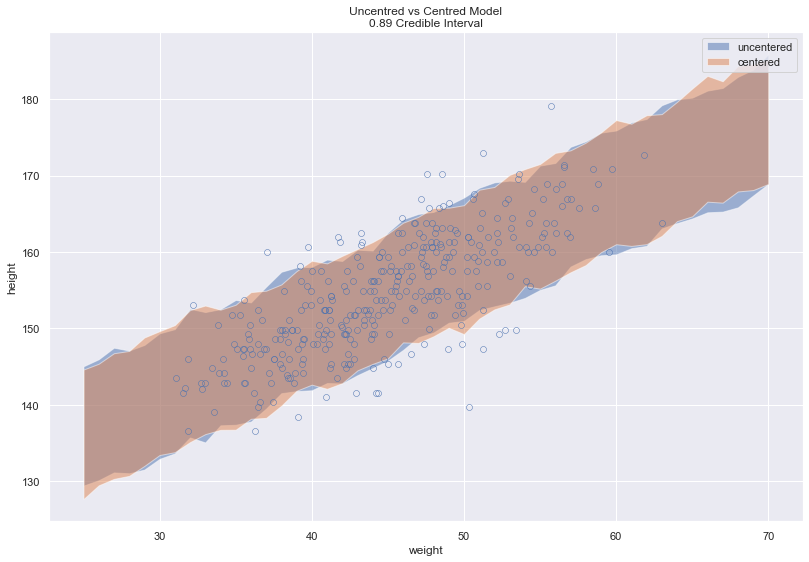

In [98]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d2["weight"], d2["height"], "o", mew=0.5, mec="b", mfc="None")
ax.fill_between(weight_seq, height_api[:,0], height_api[:,1], alpha=0.50, label="uncentered")
ax.fill_between(weight_seq, height_bpi[:,0], height_bpi[:,1], alpha=0.50, label="centered")
ax.set_title("Uncentred vs Centred Model\n0.89 Credible Interval")
ax.set_xlabel("weight")
ax.set_ylabel("height")
ax.legend();

#### 4M8.

In [99]:
d = pd.read_csv('data/cherry_blossoms.csv', sep=';', header=0)
d2 = d.dropna(subset=["doy"])
knot_list_a = np.quantile(d2["year"], np.linspace(0, 1, 10))
knot_list_b = np.quantile(d2["year"], np.linspace(0, 1, 20))

In [100]:
B_a = dmatrix(
    "bs(year, knots=knots, degree=3, include_intercept=True) - 1",
    {"year": d2["year"].values, "knots": knot_list_a[1:-1]},
)

B_b = dmatrix(
    "bs(year, knots=knots, degree=3, include_intercept=True) - 1",
    {"year": d2["year"].values, "knots": knot_list_b[1:-1]},
)

In [101]:
with pm.Model() as m_4m8a:
    a = pm.Normal("a", 100, 10)
    w = pm.Normal("w", mu=0, sd=10, shape=B_a.shape[1])
    mu = pm.Deterministic("mu", a + pm.math.dot(B_a.base, w))
    sigma = pm.Exponential("sigma", 1)
    D = pm.Normal("D", mu, sigma, observed=d2["doy"])
    trace_4m8a = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, w, a]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:10<00:00, 551.09draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [102]:
with pm.Model() as m_4m8b:
    a = pm.Normal("a", 100, 10)
    w = pm.Normal("w", mu=0, sd=10, shape=B_b.shape[1])
    mu = pm.Deterministic("mu", a + pm.math.dot(B_b.base, w))
    sigma = pm.Exponential("sigma", 1)
    D = pm.Normal("D", mu, sigma, observed=d2["doy"])
    trace_4m8b = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, w, a]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:10<00:00, 586.43draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [103]:
with pm.Model() as m_4m8c:
    a = pm.Normal("a", 100, 10)
    w = pm.Normal("w", mu=0, sd=1, shape=B_b.shape[1])
    mu = pm.Deterministic("mu", a + pm.math.dot(B_b.base, w))
    sigma = pm.Exponential("sigma", 1)
    D = pm.Normal("D", mu, sigma, observed=d2["doy"])
    trace_4m8c = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, w, a]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:04<00:00, 1279.38draws/s]


In [104]:
mu_a = pm.sample_posterior_predictive(trace_4m8a, 1000, m_4m8a, var_names=["mu"])["mu"]
mu_b = pm.sample_posterior_predictive(trace_4m8b, 1000, m_4m8b, var_names=["mu"])["mu"]
mu_c = pm.sample_posterior_predictive(trace_4m8c, 1000, m_4m8c, var_names=["mu"])["mu"]
mu_api = pm.hpd(mu_a, alpha=0.11)
mu_bpi = pm.hpd(mu_b, alpha=0.11)
mu_cpi = pm.hpd(mu_c, alpha=0.11)

100%|██████████| 1000/1000 [00:00<00:00, 3985.25it/s]


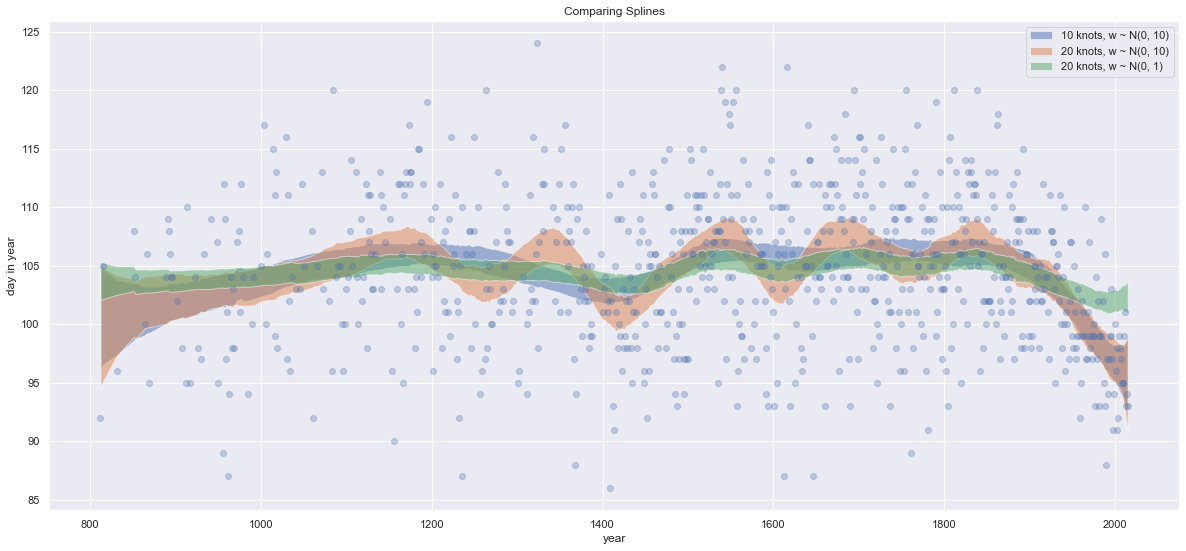

In [105]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(20.25, 9)
ax.plot(d2["year"], d2["doy"], "o", alpha=0.3);
ax.fill_between(d2["year"], mu_api[:,0], mu_api[:,1], alpha=0.50, label="10 knots, w ~ N(0, 10)");
ax.fill_between(d2["year"], mu_bpi[:,0], mu_bpi[:,1], alpha=0.50, label="20 knots, w ~ N(0, 10)");
ax.fill_between(d2["year"], mu_cpi[:,0], mu_cpi[:,1], alpha=0.50, label="20 knots, w ~ N(0, 1)");
ax.set_xlabel("year")
ax.set_ylabel("day in year")
ax.legend()
ax.set_title("Comparing Splines");

More knots makes the spline more bendy, but a tighter prior on `w` makes it flatter again.

### Hard

#### 4H1.

In [106]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d.loc[d["age"] >= 18]

In [107]:
xbar = d2["weight"].mean()
with pm.Model() as m_4h1:
    weight = pm.Data("weight", d2["weight"])
    sigma = pm.Uniform("sigma", 0, 50)    
    a = pm.Normal("a", mu=178, sigma=20)
    b = pm.Lognormal("b", mu=0, sigma=1)
    mu = a + b*(weight - xbar)
    height = pm.Normal("height", mu=mu, sigma=sigma, observed=d2["height"])
    trace_4h1 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a, sigma]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3923.37draws/s]


In [108]:
individuals = pd.DataFrame([[46.95],
                            [43.72],
                            [64.78],
                            [32.59],
                            [54.63]],
                           columns=["weight"],
                           index=pd.Series(range(1, 6), name="individual"))

In [109]:
pm.set_data({"weight": individuals["weight"]}, m_4h1)
sim_height = pm.sample_posterior_predictive(trace_4h1, 1000, m_4h1, var_names=["height"])["height"]
expected_height = sim_height.mean(0)
interval_89 = pm.hpd(sim_height, alpha=0.11)

100%|██████████| 1000/1000 [00:02<00:00, 480.71it/s]


In [110]:
(individuals
 .assign(expected_height=expected_height)
 .assign(interval_89_lb=interval_89[:, 0])
 .assign(interval_89_ub=interval_89[:, 1]))

,weight,expected_height,interval_89_lb,interval_89_ub
individual,,,,
1,46.95,156.338429,148.636607,164.760017
2,43.72,153.593808,146.493641,162.449990
3,64.78,172.306605,163.710018,180.243910
4,32.59,143.656180,135.613241,151.926874
5,54.63,163.335284,154.173755,171.176055


#### 4H2.

In [111]:
d = (pd.read_csv('Data/Howell1.csv', sep=';', header=0)
     .loc[lambda df: df["age"] < 18])

print(len(d))
d.head()

192


,height,weight,age,male
18,121.92,19.617854,12.0,1
19,105.41,13.947954,8.0,0
20,86.36,10.489315,6.5,0
23,129.54,23.586784,13.0,1
24,109.22,15.989118,7.0,0


##### (a)

In [112]:
xbar = d["weight"].mean()
with pm.Model() as m_4h2:
    weight = pm.Data("weight", d["weight"])
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b = pm.Lognormal("b", mu=0, sigma=1)
    a = pm.Normal("a", mu=100, sd=30)
    mu = pm.Deterministic("mu", a + b*(weight - xbar))
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d["height"])
    trace_4h2 = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, sigma]
Sampling 4 chains: 100%|██████████| 44000/44000 [00:10<00:00, 4204.07draws/s]


In [113]:
pm.hpd(trace_4h2["b"], alpha=0.89)*10

array([27.03033238, 27.21762318])

For every 10 units increase in weight, the model predicts an increase of between 27.05 and 27.23 units in height

##### (b)

In [114]:
weight_seq = np.arange(0, 50)
pm.set_data({"weight": weight_seq}, m_4h2)
simulated =  pm.sample_posterior_predictive(trace_4h2, 1000, m_4h2, var_names=["height", "mu"])
mu_mean = simulated["mu"].mean(axis=0)
mu_pi = pm.hpd(simulated["mu"], alpha=.11)
height_pi = pm.hpd(simulated["height"], alpha=0.11)

100%|██████████| 1000/1000 [00:02<00:00, 499.35it/s]


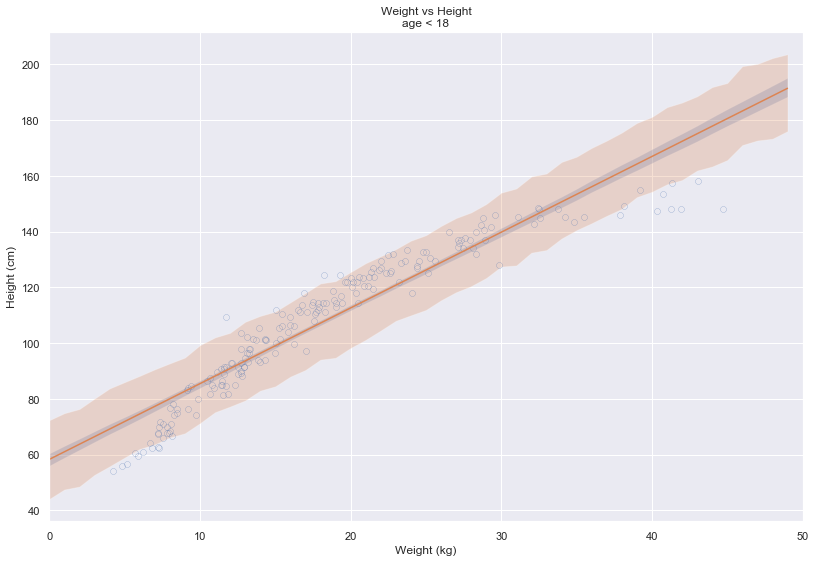

In [115]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d["weight"], d["height"], "o", mew=0.2, mec="b", mfc="None")
ax.plot(weight_seq, mu_mean)
ax.fill_between(weight_seq, mu_pi[:,0], mu_pi[:,1], alpha=0.25)
ax.fill_between(weight_seq, height_pi[:,0], height_pi[:,1], alpha=0.25);
ax.set_title("Weight vs Height\nage < 18")
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Height (cm)")
ax.set_xlim(0, 50);

##### (c)

1. The relationship between `weight` and `height` doesn't look linear
2. Age is definitely an important predictor of height between 0 and 18 years and should be included in the model

A better model could replace $\mu = \alpha + \beta w_i$ with $\mu = \alpha + \beta_1 w_i +\beta_2 a_i + \beta_2 a_i^2$ where `w` is weight and `a` is age. This takes into account that age is important and age and height are non linearly related for children.

#### 4H3.

In [116]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
print(len(d))
d.head()

544


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


##### (a)

In [117]:
d["log_weight"] = np.log(d["weight"])
xbar = d["log_weight"].mean()
with pm.Model() as m_4h3:
    logweight = pm.Data("logweight", d["log_weight"])
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b = pm.Lognormal("b", mu=0, sigma=1)
    a = pm.Normal("a", mu=178, sd=100)
    mu = pm.Deterministic("mu", a + b*(logweight - xbar))
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d["height"])
    trace_4h3 = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, sigma]
Sampling 4 chains: 100%|██████████| 44000/44000 [00:11<00:00, 3932.13draws/s]


In [118]:
pm.summary(trace_4h3, alpha=0.03,  varnames=["a", "b", "sigma"])

,mean,sd,mc_error,hpd_1.5,hpd_98.5,n_eff,Rhat
a,138.265075,0.221799,0.000897,137.778808,138.743140,57225.053400,1.000013
b,47.069682,0.383713,0.001443,46.249319,47.914426,62039.822939,0.999995
sigma,5.156129,0.158269,0.000658,4.822678,5.503209,63295.973771,0.999968


A 1 unit increase in log-weight, which corresponds to almost a tripling in weight leads to a 47 cm increase in height.

##### (b)

In [119]:
logweight_seq = np.log(np.arange(1, 71))
pm.set_data({"logweight": logweight_seq}, m_4h3)
simulated = pm.sample_posterior_predictive(trace_4h3, 1000, m_4h3, var_names=["height", "mu"])
mu_mean = simulated["mu"].mean(axis=0)
mu_pi = pm.hpd(simulated["mu"], alpha=0.03)
height_pi = pm.hpd(simulated["height"], alpha=0.03)

100%|██████████| 1000/1000 [00:02<00:00, 488.68it/s]


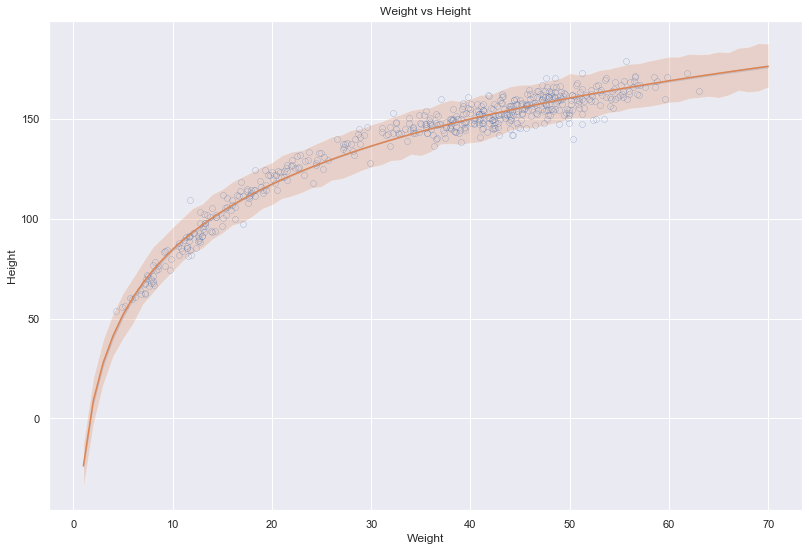

In [120]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d["weight"], d["height"], "o", mew=0.2, mec="b", mfc="None")
ax.plot(np.exp(logweight_seq), mu_mean)
ax.fill_between(np.exp(logweight_seq), mu_pi[:,0], mu_pi[:,1], alpha=0.25)
ax.fill_between(np.exp(logweight_seq), height_pi[:,0], height_pi[:,1], alpha=0.25);
ax.set_title("Weight vs Height")
ax.set_xlabel("Weight")
ax.set_ylabel("Height");

#### 4H4.

In [121]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d["weight_s"] = (d["weight"] - d["weight"].mean())/d["weight"].std()
d["weight_s2"] = d["weight_s"]**2

with pm.Model() as m_4h4:
    weight_s = pm.Data("weight_s", d["weight_s"])
    weight_s2 = pm.Data("weight_s2", d["weight_s2"])
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b2 = pm.Normal("b2", mu=0, sd=1)
    b1 = pm.Lognormal("b1", mu=0, sd=1)
    a = pm.Normal("a", mu=178, sd=20)
    mu = pm.Deterministic("mu", a + b1*weight_s + b2*weight_s2)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d["height"])

In [122]:
weight_seq = np.linspace(-2.2, 2, 30)
pm.set_data({"weight_s": weight_seq,
             "weight_s2": weight_seq**2},
            m_4h4)
simulated = pm.sample_prior_predictive(1000, m_4h4, var_names=["height", "mu"])
mu_mean = simulated["mu"].mean(axis=0)
mu_pi = pm.hpd(simulated["mu"], alpha=0.11)
height_pi = pm.hpd(simulated["height"], alpha=0.11)

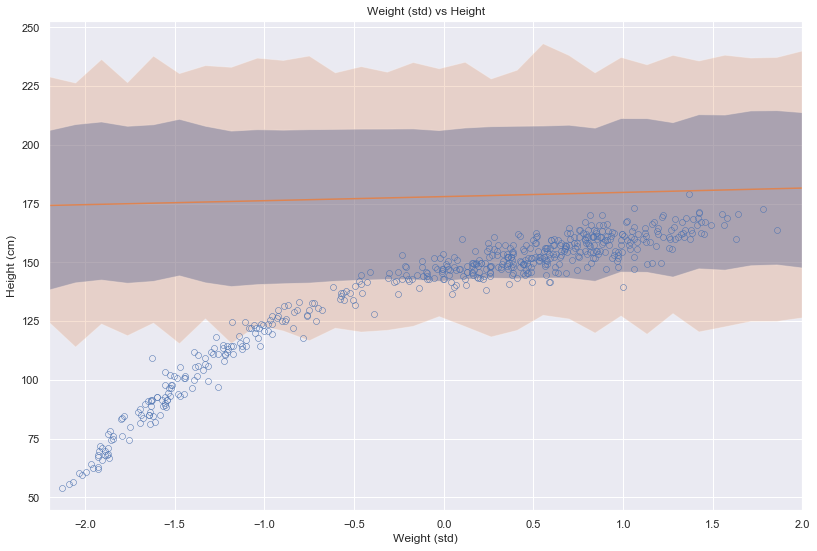

In [123]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d["weight_s"], d["height"], "o", mew=0.5, mec="b", mfc="None")
ax.plot(weight_seq, mu_mean)
ax.fill_between(weight_seq, mu_pi[:,0], mu_pi[:,1], alpha=0.50);
ax.fill_between(weight_seq, height_pi[:,0], height_pi[:,1], alpha=0.25);
ax.set_title("Weight (std) vs Height")
ax.set_xlabel("Weight (std)")
ax.set_ylabel("Height (cm)")
ax.set_xlim(-2.2, 2);

##### 4H5.

In [124]:
d = pd.read_csv('data/cherry_blossoms.csv', sep=';', header=0)
d2 = d.dropna(subset=["doy", "temp"])
print(len(d2))
d2.head()

787


,year,doy,temp,temp_upper,temp_lower
50,851,108.0,7.38,12.10,2.66
63,864,100.0,6.42,8.69,4.14
65,866,106.0,6.44,8.11,4.77
88,889,104.0,6.83,8.48,5.19
90,891,109.0,6.98,8.96,5.00


Plotting `temp` against `doy`

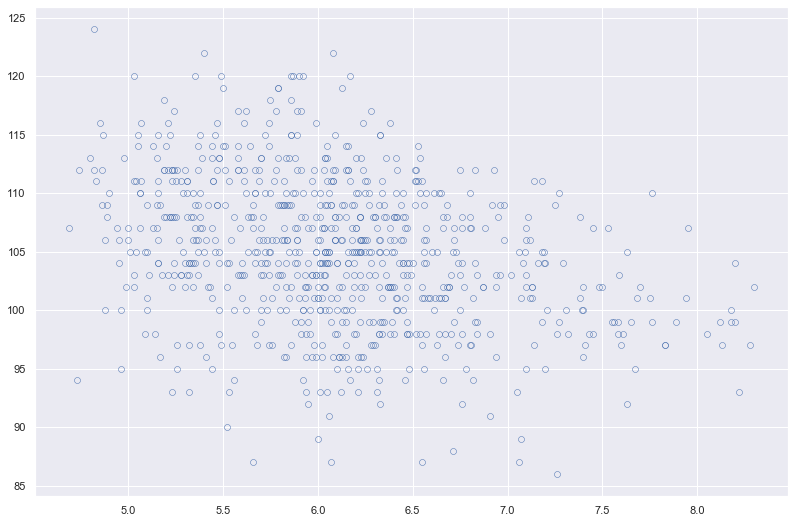

In [125]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d2["temp"], d2["doy"], "o", mew=0.5, mec="b", mfc="None");

There might be a slight negative relationship between temperature and blossom date

In [126]:
d2["temp_s"] = (d2["temp"] - d2["temp"].mean())/d2["temp"].std()
with pm.Model() as m_4h5:
    temp_s = pm.Data("temp_s", d2["temp_s"])
    sigma = pm.Exponential("sigma", lam=1/30)
    b = pm.Normal("b", mu=0, sd=1)
    a = pm.Normal("a", mu=178, sd=20)
    mu = pm.Deterministic("mu", a + b*temp_s)
    doy = pm.Normal("doy", mu=mu, sd=sigma, observed=d2["doy"])
    trace_4h5 = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, sigma]
Sampling 4 chains: 100%|██████████| 44000/44000 [00:11<00:00, 3677.60draws/s]


In [127]:
temp_seq = np.linspace(-2.2, 2, 30)
pm.set_data({"temp_s": temp_seq}, m_4h5)
simulated = pm.sample_posterior_predictive(trace_4h5, 1000, m_4h5, var_names=["doy", "mu"])
mu_mean = simulated["mu"].mean(axis=0)
mu_pi = pm.hpd(simulated["mu"], alpha=0.11)
doy_pi = pm.hpd(simulated["doy"], alpha=0.11)

100%|██████████| 1000/1000 [00:01<00:00, 554.93it/s]


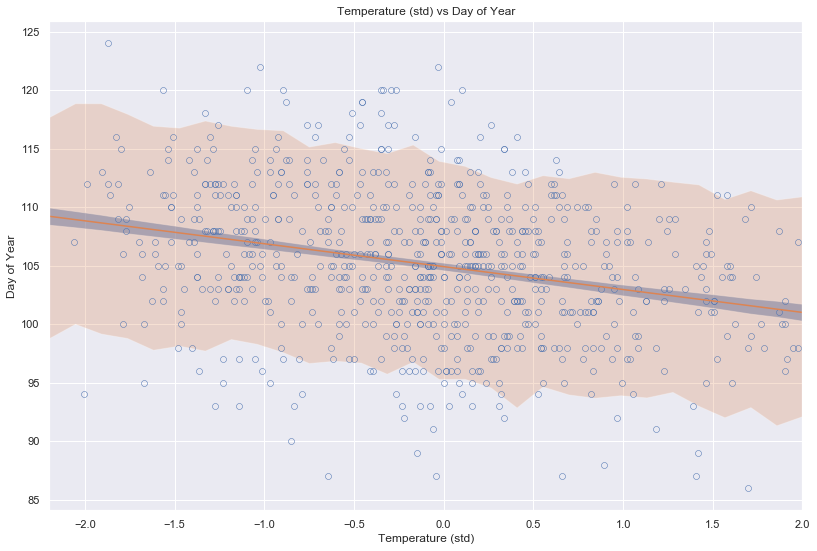

In [128]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d2["temp_s"], d2["doy"], "o", mew=0.5, mec="b", mfc="None")
ax.plot(temp_seq, mu_mean)
ax.fill_between(temp_seq, mu_pi[:,0], mu_pi[:,1], alpha=0.50);
ax.fill_between(temp_seq, doy_pi[:,0], doy_pi[:,1], alpha=0.25);
ax.set_title("Temperature (std) vs Day of Year")
ax.set_xlabel("Temperature (std)")
ax.set_ylabel("Day of Year")
ax.set_xlim(-2.2, 2);

It does seem that there's a negative correlation between temperature and day of year.

#### 4H6.

In [129]:
d = pd.read_csv('data/cherry_blossoms.csv', sep=';', header=0)
d2 = d.dropna(subset=["doy"])
num_knots = 15
knot_list = np.quantile(d2["year"], np.linspace(0, 1, num_knots))
B = dmatrix(
    "bs(year, knots=knots, degree=3, include_intercept=True) - 1",
    {"year": d2["year"].values, "knots": knot_list[1:-1]},
)

In [130]:
with pm.Model() as m_4h6a:
    a = pm.Normal("a", 100, 10)
    w = pm.Normal("w", mu=0, sd=10, shape=B.shape[1])
    mu = pm.Deterministic("mu", a + pm.math.dot(B.base, w))
    sigma = pm.Exponential("sigma", 1)
    D = pm.Normal("D", mu, sigma, observed=d2["doy"])

In [131]:
with pm.Model() as m_4h6b:
    a = pm.Normal("a", 100, 10)
    w = pm.Normal("w", mu=0, sd=1, shape=B.shape[1])
    mu = pm.Deterministic("mu", a + pm.math.dot(B.base, w))
    sigma = pm.Exponential("sigma", 1)
    D = pm.Normal("D", mu, sigma, observed=d2["doy"])

In [132]:
mu_a = pm.sample_prior_predictive(1000, m_4h6a, var_names=["mu"])["mu"]
mu_b = pm.sample_prior_predictive(1000, m_4h6b, var_names=["mu"])["mu"]
mu_api = pm.hpd(mu_a, alpha=0.11)
mu_bpi = pm.hpd(mu_b, alpha=0.11)

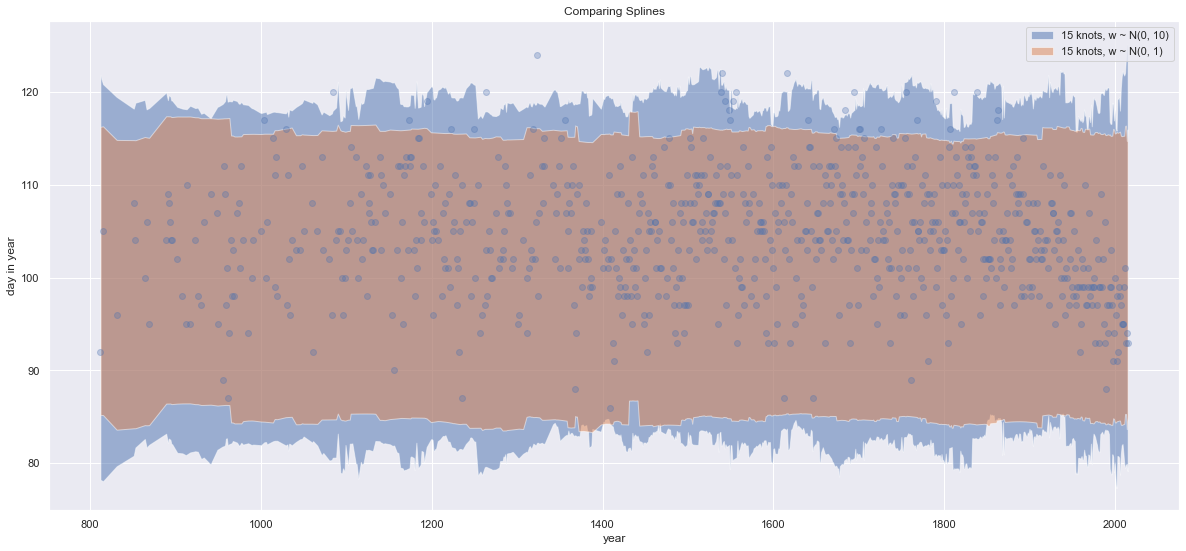

In [133]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(20.25, 9)
ax.plot(d2["year"], d2["doy"], "o", alpha=0.3);
ax.fill_between(d2["year"], mu_api[:,0], mu_api[:,1], alpha=0.50, label="15 knots, w ~ N(0, 10)");
ax.fill_between(d2["year"], mu_bpi[:,0], mu_bpi[:,1], alpha=0.50, label="15 knots, w ~ N(0, 1)");
ax.set_xlabel("year")
ax.set_ylabel("day in year")
ax.legend()
ax.set_title("Comparing Splines");

Reducing the prior on `w` reduces the flexibility of the model.